# **CLASSIFICATION MODEL FOR THE SIDE EFFECTS OF DRUGS**


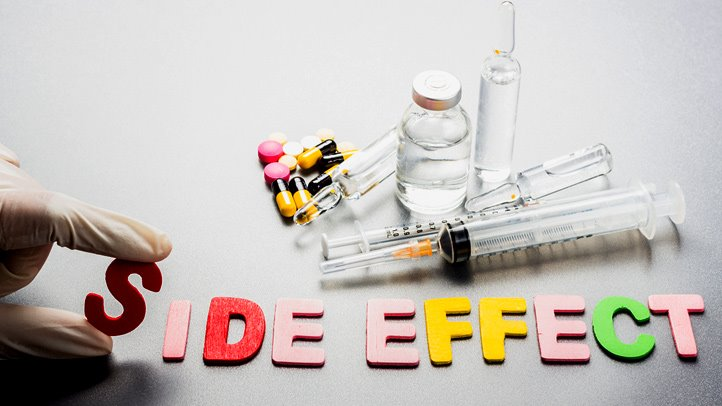

**TO MODEL A CLASSIFICATION MODEL FOR THE SIDEEFFECTS OF DRUGS**.

FOR THAT I SELECTED A DATASET FROM KAGGLE HAVING MORE THAN 3LAKH DATA
ENTRIES AND 12 COLUMNS WHICH INCLUDES Race, Age	, Condition,	Date,	Drug	,DrugId,	EaseofUse,	Effectiveness,	Reviews,	Satisfaction,	Sex,	Sideeffects.

# **BASIC DATA ANALYSIS**

# **Import the libraries **

In [1]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import altair as alt
import itertools
import keras
import math
import re
import string
import spacy
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Import dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv(r'/content/drive/MyDrive/webmd.csv')

Mounted at /content/drive


# **Display dataset**

In [4]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# **BASIC DATA ANALYSIS**

In [5]:
data.shape #find the shape of dataset

(362806, 12)

In [6]:
data.info()#basic dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [7]:
data.columns # columns in dataset

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [8]:
data = pd.DataFrame(data)# display categorical colums

# Get the column names of categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:")
for column in categorical_columns:
    print(column)



Categorical columns:
Age
Condition
Date
Drug
Reviews
Sex
Sides


In [9]:
data = pd.DataFrame(data)#display numerical columns

# Get the column names of numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("Numerical column headings:")
for column in numerical_columns:
    print(column)

Numerical column headings:
DrugId
EaseofUse
Effectiveness
Satisfaction
UsefulCount


In [10]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


## Adding names and race to the dataframe. This just for easiness to analysis.

In [11]:
pip install mimesis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 7.1 MB/s eta 0:00:00


In [12]:
from mimesis import Person
person = Person('en')

# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])
data_name.head()

,Name
0,Thomas
1,Vi
2,Dannette
3,Richie
4,Clarence


In [13]:
import random

options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head()

,Race
0,Hispanic
1,Black
2,Hispanic
3,White
4,Asian


In [14]:
data1 = pd.concat([data_name, data_race, data], axis=1).reindex(data.index)
data1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Thomas,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Vi,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Dannette,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Richie,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Clarence,Asian,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# **DATA PROCESSING**

# Finding NULL values

In [15]:
for i in data1:
    data1[i]=np.where(data1[i]==" ",np.NAN,data1[i])

data1.isna().sum()

Name                 0
Race                 0
Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41861
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

Age condition reviews sex and seide effects column having null values.

In [16]:
data1.shape

(362806, 14)

# **Missing values imputation**

In [17]:
# drop 'Other' condition from original dataset as other condition does not have any meaning

data1=data1.drop(labels=data[data1.Condition=='Other'].index,axis=0)

In [18]:
#Missing value imputation for categorical vlaue
#Get the object columns

obj_columns1=data1[['Age']]
obj_columns2 = data1[['Reviews']]
obj_columns3 = data1[['Sex']]
obj_columns4 = data1[['Sides']]
obj_columns5 = data1[['Condition']]

In [19]:
df=data1

In [20]:
# mode value for each object column

age_mode = df.Age.mode()
Reviews_mode = df.Reviews.mode()
Sex_mode = df.Sex.mode()
Sides_mode = df.Sides.mode()
Condition_mode = df.Condition.mode()
print (" Mode for Age column\n",age_mode)
print (" \nMode for Reviews column\n",Reviews_mode)
print (" \nMode for Sex column\n",Sex_mode)
print (" \nMode for Sides column\n",Sides_mode)
print (" \nMode for Condition column\n",Condition_mode)

 Mode for Age column
 0    45-54
Name: Age, dtype: object
 
Mode for Reviews column
 0    this treatment is awsome.  I love drugs.
Name: Reviews, dtype: object
 
Mode for Sex column
 0    Female
Name: Sex, dtype: object
 
Mode for Sides column
 0    Nausea ,  vomiting ,  constipation ,  lighthea...
Name: Sides, dtype: object
 
Mode for Condition column
 0    Pain
Name: Condition, dtype: object


In [21]:
#Missing value imputation for categorical vlaue
obj_columns1 = obj_columns1.fillna(obj_columns1.mode().iloc[0])
obj_columns2 = obj_columns2.fillna(obj_columns2.mode().iloc[0])
obj_columns3 = obj_columns3.fillna(obj_columns3.mode().iloc[0])
obj_columns4 = obj_columns4.fillna(obj_columns4.mode().iloc[0])
obj_columns5 = obj_columns5.fillna(obj_columns5.mode().iloc[0])

In [22]:
#Join the data set with imputed object dataset
data_cleaned=pd.concat([df,obj_columns1,obj_columns2,obj_columns3,obj_columns4,obj_columns5],axis=1)

In [23]:
# drop the column having null values
data_cleaned = data_cleaned.dropna(how = 'any', axis = 1)

In [24]:
# As input feature should be in interger data type, so change the data type of every feature
# Total unique values in age and sex column


print("unique values in age column:\n",data_cleaned['Age'].unique())
print("\n unique values in Sex column:\n",data_cleaned['Sex'].unique())
print("\n unique values in Drug column:\n",data_cleaned['Drug'].unique())
print("\n unique values in Condition column:\n",data_cleaned['Condition'].unique())
print("\n unique values in Sidescolumn:\n",data_cleaned['Sides'].unique())


unique values in age column:
 ['75 or over' '25-34' '45-54' '55-64' '19-24' '35-44' '13-18' '65-74'
 '7-12' '0-2' '3-6']

 unique values in Sex column:
 ['Male' 'Female']

 unique values in Drug column:
 ['25dph-7.5peh' 'wymzya fe' '12 hour nasal relief spray, non-aerosol' ...
 'chest congestion relief dm' 'chantix' 'chateal']

 unique values in Condition column:
 ['Stuffy Nose' 'Cold Symptoms' 'Birth Control' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']

 unique values in Sidescolumn:
 ['Drowsiness,  dizziness ,  dry mouth /nose/throat,  headache ,  upset stomach ,  constipation , or  trouble sleeping  may occur.'
 'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.'
 'Temporary burning, stinging, dryness in the nose,  runny nose , and  sneezing  may occur.'
 ...
 'Drowsiness,  dizziness ,  nausea ,  constipation ,  blurred vision , o

In [25]:

data_cleaned.isna().sum()# checking null values after imputation

Name             0
Race             0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Age              0
Reviews          0
Sex              0
Sides            0
Condition        0
dtype: int64

In [26]:
unique_values = data_cleaned.nunique() #checking unique values

print(unique_values)

Name               3323
Race                  4
Date               4523
Drug               5641
DrugId             5135
EaseofUse             6
Effectiveness         6
Satisfaction          6
UsefulCount         147
Age                  11
Reviews          214424
Sex                   2
Sides              1594
Condition          1804
dtype: int64


From this i can understand that 5641 different drugs are mentioned in this dataset.

In [27]:
# To covert data type of sex and age column into integer used mapping here
#data_cleaned['Age'] = data_cleaned['Age'].map({'0-2': 1,
                                              # '3-6': 2,
                                              # '7-12': 3,
                                               #'13-18': 4,
                                               #'19-24': 5,
                                               #'25-34': 6,
                                               #'35-44': 7,
                                               #'45-54': 8,
                                               #'55-64': 9,
                                               #'65-74': 10,
                                              # '75 or over': 11}).astype(int)

#data_cleaned['Sex'] = data_cleaned['Sex'].map({'Male': 0, 'Female': 1}).astype(int)


In [28]:
# Converting the date in to date time format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

In [29]:
# Remove the Drugs whose counts is less than 5 i.e. removed[1,2,3,4,5]
from collections import Counter
counts = data_cleaned['Drug'].value_counts()

data_cleaned = data_cleaned[~data_cleaned['Drug'].isin(counts[counts < 6].index)]

In [30]:
print('Original Data set shape',df.shape),
print('\nClean Data set shape',data_cleaned.shape),

Original Data set shape (313041, 14)

Clean Data set shape (307072, 14)


(None,)

After preprocessing the dataset is cutdown from Original Data set shape (313041, 14)

Clean Data set shape (307072, 14)

In [31]:
most_common_value = data_cleaned.mode().iloc[0] #finding most repeated values

print(most_common_value)

Name                                                         Dusty
Race                                                         White
Date                                           2007-10-29 00:00:00
Drug                                                    lisinopril
DrugId                                                      6873.0
EaseofUse                                                      5.0
Effectiveness                                                  5.0
Satisfaction                                                   5.0
UsefulCount                                                    0.0
Age                                                          45-54
Reviews                   this treatment is awsome.  I love drugs.
Sex                                                         Female
Sides            Nausea ,  vomiting ,  constipation ,  lighthea...
Condition                                                     Pain
Name: 0, dtype: object


From this i can understand that the drugname which is most mentioned in data is  Drug name and the Drug Id mentioned is **6873(lisinopril)**. Age group of 45-54 and female people affects more.

In [32]:
unique_values = df['Drug'].unique()
most_repeated_value = unique_values[0]
most_repeated_value_count = 0

for value in unique_values:
    count = df['Drug'].value_counts()[value]
    if count > most_repeated_value_count:
        most_repeated_value = value
        most_repeated_value_count = count

print(f"Most repeated value: {most_repeated_value}")

Most repeated value: lisinopril solution


# From this I confirmed the drug name mentioned most is as LISINOPRIL

In [33]:
unique_values1 = df['DrugId'].unique()
most_repeated_value_drugid = unique_values1[0]
most_repeated_value_count_drugid = 0

for value in unique_values1:
    count = df['DrugId'].value_counts()[value]
    if count > most_repeated_value_count_drugid:
      most_repeated_value_drugid = value
      most_repeated_value_count_drugid = count

print(f"Most repeated value: {most_repeated_value_drugid}")

Most repeated value: 6873.0


## From this i confirmed the drugid most mentioned is **6873 lisinopril**

In [34]:
most_repeated_Drugnames= df['Drug'].value_counts().sort_values(ascending=False)

most_repeated_Drugnames

lisinopril solution               4158
lisinopril                        4158
cymbalta                          4134
lexapro                           3890
hydrocodone-acetaminophen         3818
                                  ... 
neutrogena t-gel 0.5 % shampoo       1
taytulla                             1
tavalisse                            1
nymalize                             1
varubi                               1
Name: Drug, Length: 5641, dtype: int64

Arranging all the drugnames count in descending order. most mentioned drug Lisinopril.

In [35]:
df.Drug.value_counts()

lisinopril solution                                                             4158
lisinopril                                                                      4158
cymbalta                                                                        4134
lexapro                                                                         3890
hydrocodone-acetaminophen                                                       3818
                                                                                ... 
nourianz 40 mg tablet antiparkinson adjuvant - adenosine receptor antagonist       1
advil allergy-congestion rlf                                                       1
norwegian cod liver oil                                                            1
adult robitussin peak cold m-s                                                     1
varubi                                                                             1
Name: Drug, Length: 5641, dtype: int64

In [36]:
most_repeated_DrugId= df['DrugId'].value_counts().sort_values(ascending=False)

most_repeated_DrugId

6873.0      8316
1025.0      7492
6007.0      6585
4398.0      5536
11285.0     4662
            ... 
160793.0       1
12218.0        1
155429.0       1
55301.0        1
148938.0       1
Name: DrugId, Length: 5135, dtype: int64

arrange the drugId in descending order according to counts. from this i understand that 6873 lisinopril lexopraoxycodone (1025) is the most used drugs.

In [37]:
count_of_drugid_6873 = most_repeated_DrugId.get(6873, 0)
print("Count of DrugId 6873:", count_of_drugid_6873)
drug_name = data_cleaned.loc[data_cleaned['DrugId'] == 1025, 'Drug'].iloc[0]
print(f"The name of the drug with drug ID 1025 is {drug_name}.")
count_of_drugid_1025 = most_repeated_DrugId.get(1025, 0)
print("Count of DrugId 1025:", count_of_drugid_1025)


Count of DrugId 6873: 8316
The name of the drug with drug ID 1025 is oxycodone tablet, oral only.
Count of DrugId 1025: 7492


so the DrugId 6873 is most

In [87]:
satisfaction_count=data_cleaned['Satisfaction'].value_counts()
effectiveness_count=data_cleaned['Effectiveness'].value_counts()
ease_of_use_count=data_cleaned['EaseofUse'].value_counts()
li = [0,1,2,3,4,5,6]
Rating = pd.Series(li)
value_count=pd.concat([Rating ,satisfaction_count,effectiveness_count,ease_of_use_count],axis=1)
value_count.rename(columns = {0:'Rating','Satisfaction':'satisfaction_count','Effectiveness':'effectiveness_count','EaseofUse':'ease_of_use_count'}, inplace = True)

In [39]:
value_count

,Rating,satisfiction_count,effectiveness_count,ease_of_use_count
0.0,0,NaN,NaN,NaN
1.0,1,83835.0,47821.0,28906.0
2.0,2,30372.0,26247.0,15166.0
3.0,3,44578.0,51730.0,34841.0
4.0,4,54465.0,70652.0,64047.0
5.0,5,93820.0,110620.0,164110.0
6.0,6,2.0,2.0,2.0


In [40]:

df1=data_cleaned
# Define the conditions for dropping rows
conditions = [
    df1['Satisfaction'] == 10,
    df1['Satisfaction'] == 6,
    df1['Effectiveness'] == 10,
    df1['Effectiveness'] == 6,
    df1['EaseofUse'] == 10,
    df1['EaseofUse'] == 6
]

# Combine the conditions using the logical OR operator
condition = np.logical_or.reduce(conditions)

# Drop the rows that meet the condition
df1.drop(df1[condition].index, inplace=True)


In [41]:
print('Original Data set shape',df.shape),
print('\nClean Data set shape',df1.shape),

Original Data set shape (313041, 14)

Clean Data set shape (307070, 14)


(None,)

In [42]:
import os
os.getcwd()

'/content'

In [43]:
df1.to_csv('new_data') #save the cleaned data set

In [44]:
df1.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,307070.000000,307070.000000,307070.000000,307070.000000,307070.000000
mean,35320.755075,4.039792,3.553629,3.143495,6.966428
std,51544.980762,1.300421,1.439781,1.603088,9.441350
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4729.000000,3.000000,3.000000,1.000000,1.000000
50%,8862.000000,5.000000,4.000000,3.000000,4.000000
75%,63163.000000,5.000000,5.000000,5.000000,9.000000
max,178485.000000,5.000000,5.000000,5.000000,222.000000


# **EXPLORATORY DATA ANALYSIS**

**TYPES OF EXPLORATORY DATA ANALYSIS:**

Univariate Non-graphical

Multivariate Non-graphical

Univariate graphical

Multivariate graphical

**UNIVARIATE NON-GRAPHICAL**

In [45]:
df1.shape

(307070, 14)

In [46]:
df1.Sex.value_counts()

Female    223662
Male       83408
Name: Sex, dtype: int64

female are using this medicine more.

In [47]:
df1.Age.value_counts()

45-54         77788
55-64         64166
35-44         46264
25-34         41763
65-74         35160
19-24         20706
75 or over    12938
13-18          5905
7-12           1384
3-6             655
0-2             341
Name: Age, dtype: int64

age group between 45-54 uses more.

In [48]:
df1['Year'] = pd.to_datetime(df1['Date'], errors='coerce').dt.year
df1['Month'] = pd.to_datetime(df1['Date'], errors='coerce').dt.month
df1['day_of_week'] = pd.to_datetime(df1['Date'], errors='coerce').dt.day_name()


In [49]:
data_cleaned=df1

**UNIVARIATE GRAPHICAL ANALYSIS**

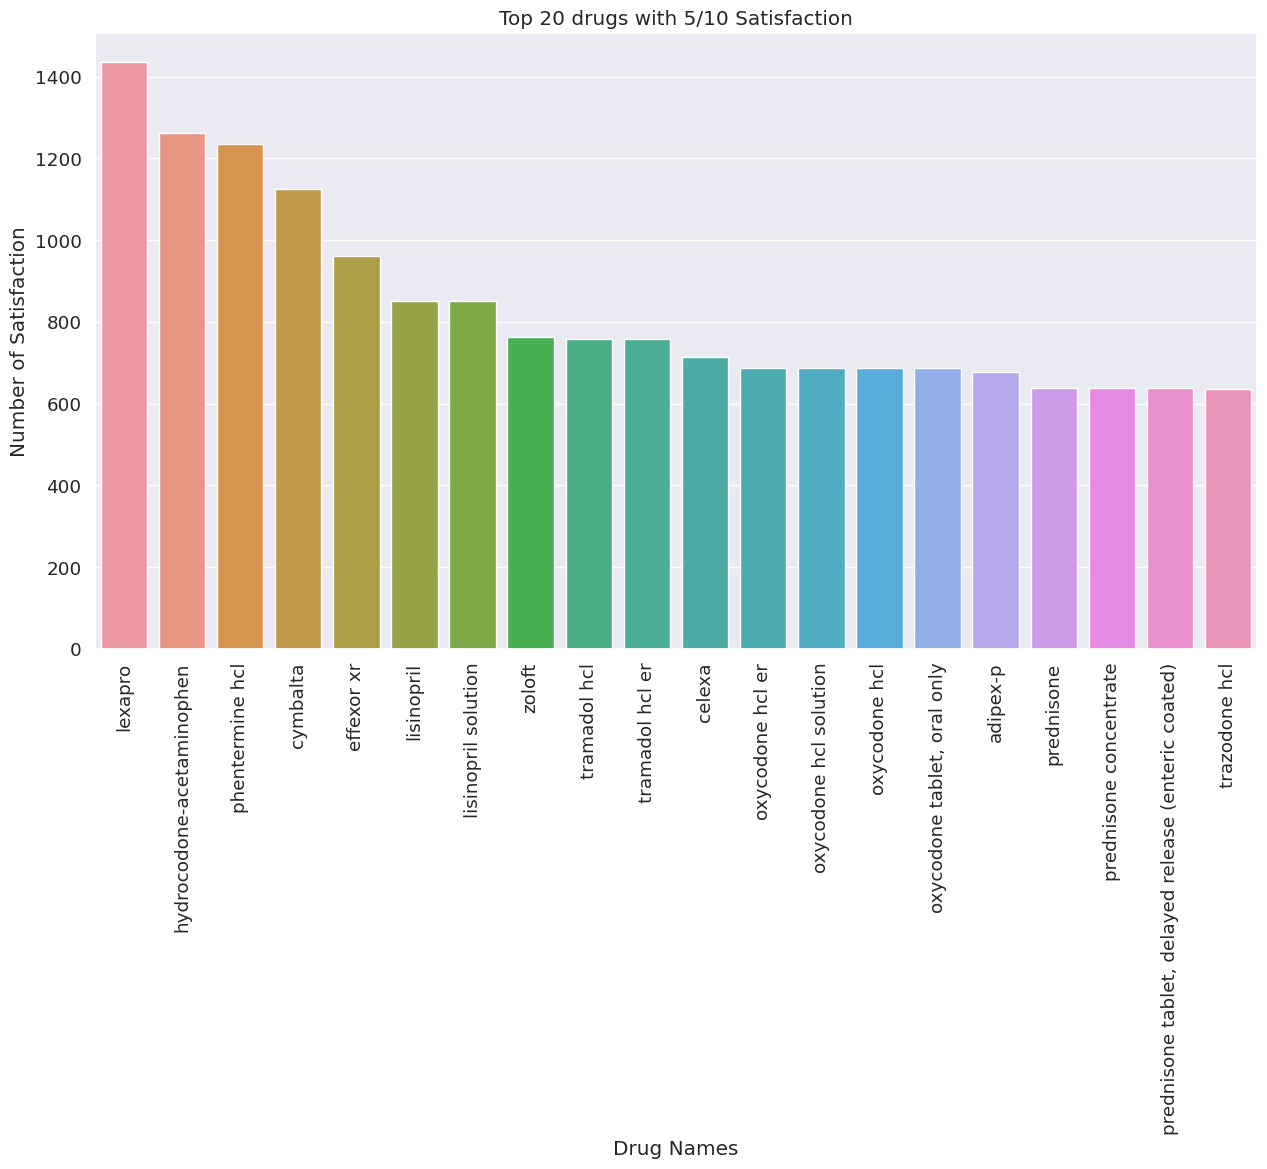

In [50]:
# This barplot shows the top 20 drugs with the 5/10 Satisfaction ratings

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

Satisfaction = dict(data_cleaned.loc[data_cleaned.Satisfaction == 5, "Drug"].value_counts())
drugname = list(Satisfaction.keys())
drug_Satisfaction = list(Satisfaction.values())

sns_Satisfaction = sns.barplot(x = drugname[0:20], y = drug_Satisfaction[0:20])
sns_Satisfaction.set_title('Top 20 drugs with 5/10 Satisfaction')
sns_Satisfaction.set_ylabel("Number of Satisfaction")
sns_Satisfaction.set_xlabel("Drug Names")
plt.setp(sns_Satisfaction.get_xticklabels(), rotation=90);

In [93]:

drug_name = data_cleaned.loc[data_cleaned['Drug'] == 'lexapro', 'DrugId'].iloc[0]
print(f"The  drug ID of lexapro is {drug_name}.")
count_of_drug_lexapro = most_repeated_Drugnames.get('lexapro', 0)
print("Count of Drug lexapro:", count_of_drug_lexapro)



The  drug ID of lexapro is 63990.0.
Count of Drug lexapro: 3890


most satisfaction is for lexapro.count of lisinopril users is morethan 8000 but lexapro is used by 3800 users. LIsinopril is less satisfied medicine. why i mentioned lisinopril because its the most mentioned drug in this dataset.

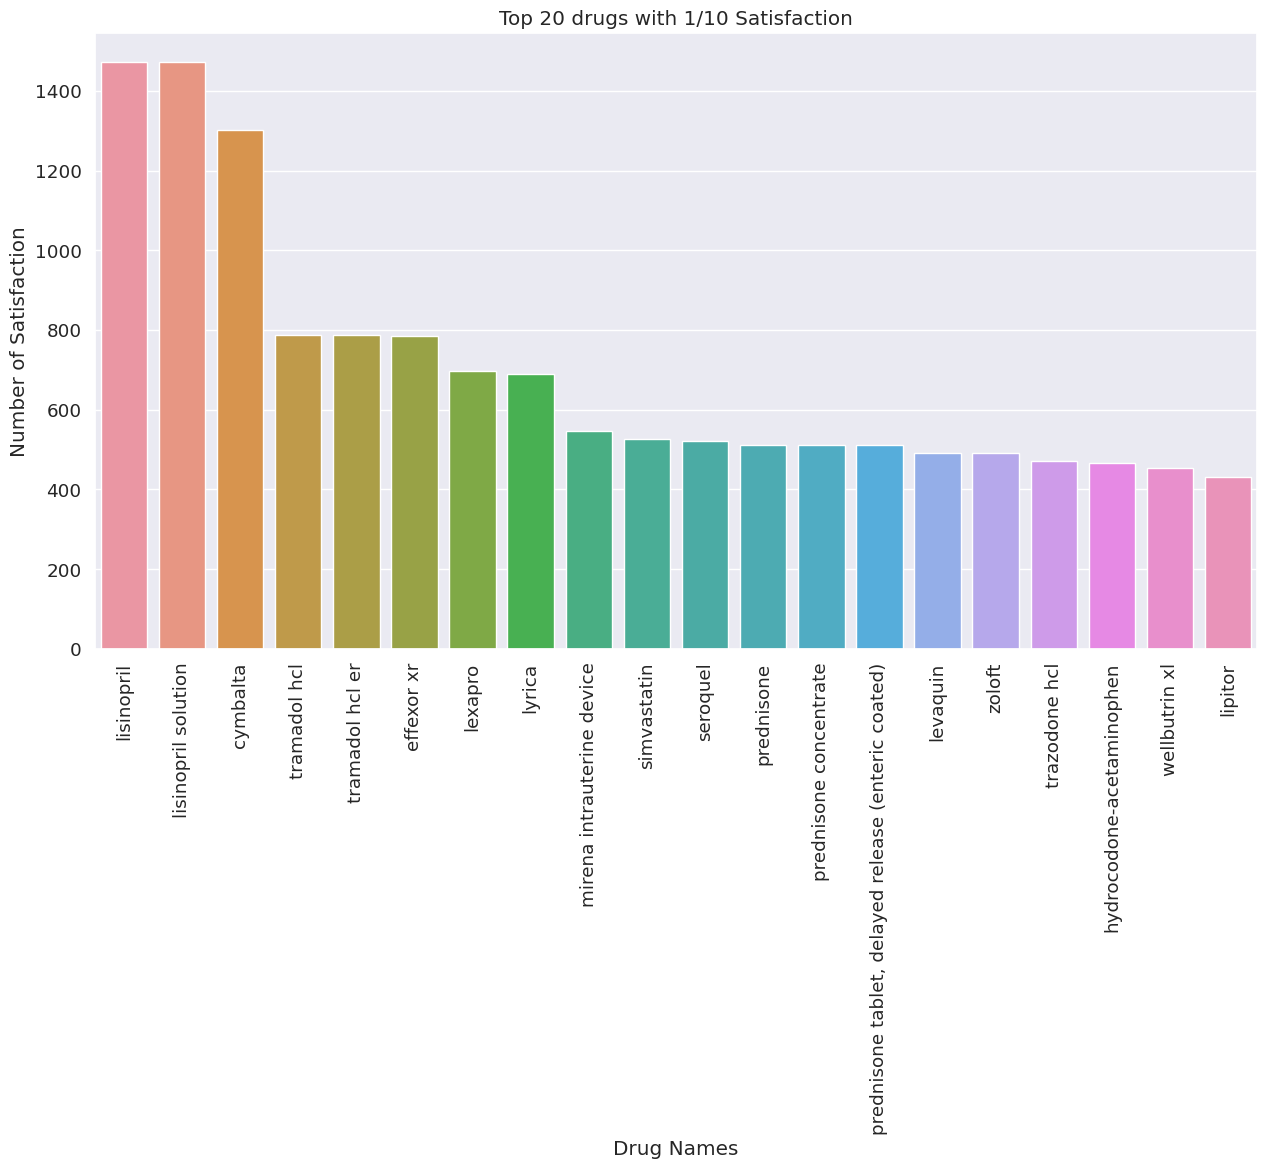

In [51]:
# This barplot shows the top 20 drugs with the 1/10 Satisfaction_ratings
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

Satisfaction = dict(data_cleaned.loc[data_cleaned.Satisfaction == 1, "Drug"].value_counts())
drugname = list(Satisfaction.keys())
drug_Satisfaction = list(Satisfaction.values())

sns_Satisfaction = sns.barplot(x = drugname[0:20], y = drug_Satisfaction[0:20])

sns_Satisfaction.set_title('Top 20 drugs with 1/10 Satisfaction')
sns_Satisfaction.set_ylabel("Number of Satisfaction")
sns_Satisfaction.set_xlabel("Drug Names")
plt.setp(sns_Satisfaction.get_xticklabels(), rotation=90);

least satisfaction rate of 1 for Lisinopril.

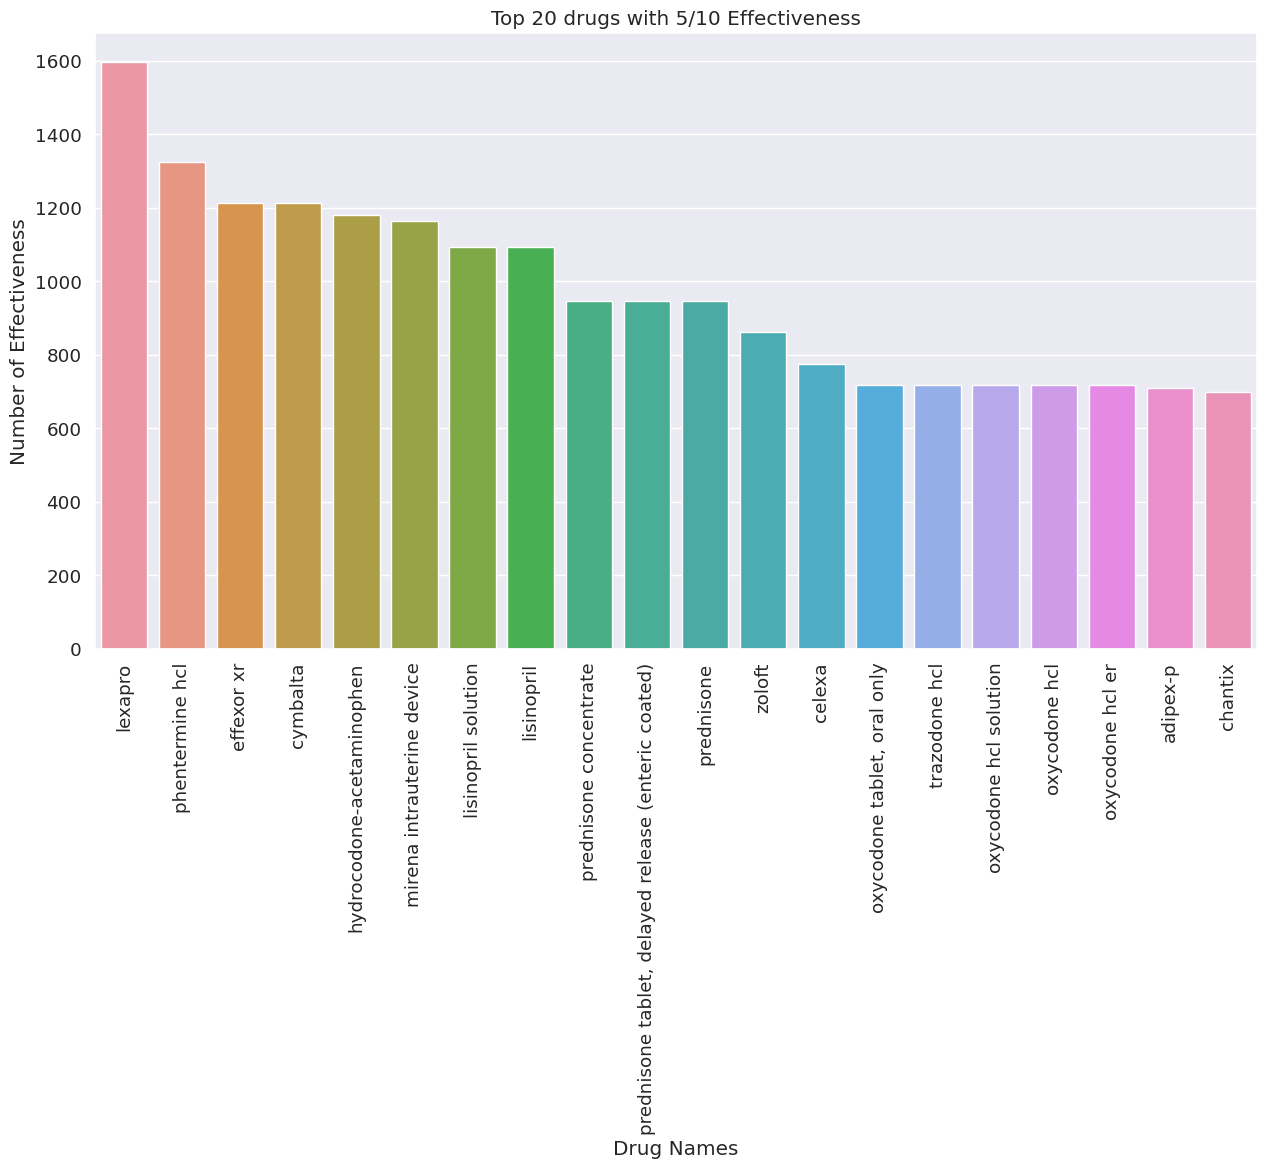

In [52]:
# This barplot shows the top 20 drugs with the 5/10 Effectiveness


# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

Effectiveness = dict(data_cleaned.loc[data_cleaned.Effectiveness == 5, "Drug"].value_counts())
drugname = list(Effectiveness.keys())
drug_Effectiveness = list(Effectiveness.values())

sns_Effectiveness = sns.barplot(x = drugname[0:20], y = drug_Effectiveness[0:20])

sns_Effectiveness.set_title('Top 20 drugs with 5/10 Effectiveness')
sns_Effectiveness.set_ylabel("Number of Effectiveness")
sns_Effectiveness.set_xlabel("Drug Names")
plt.setp(sns_Effectiveness.get_xticklabels(), rotation=90);

lexapro is most effective. lisinopril is not much effective.

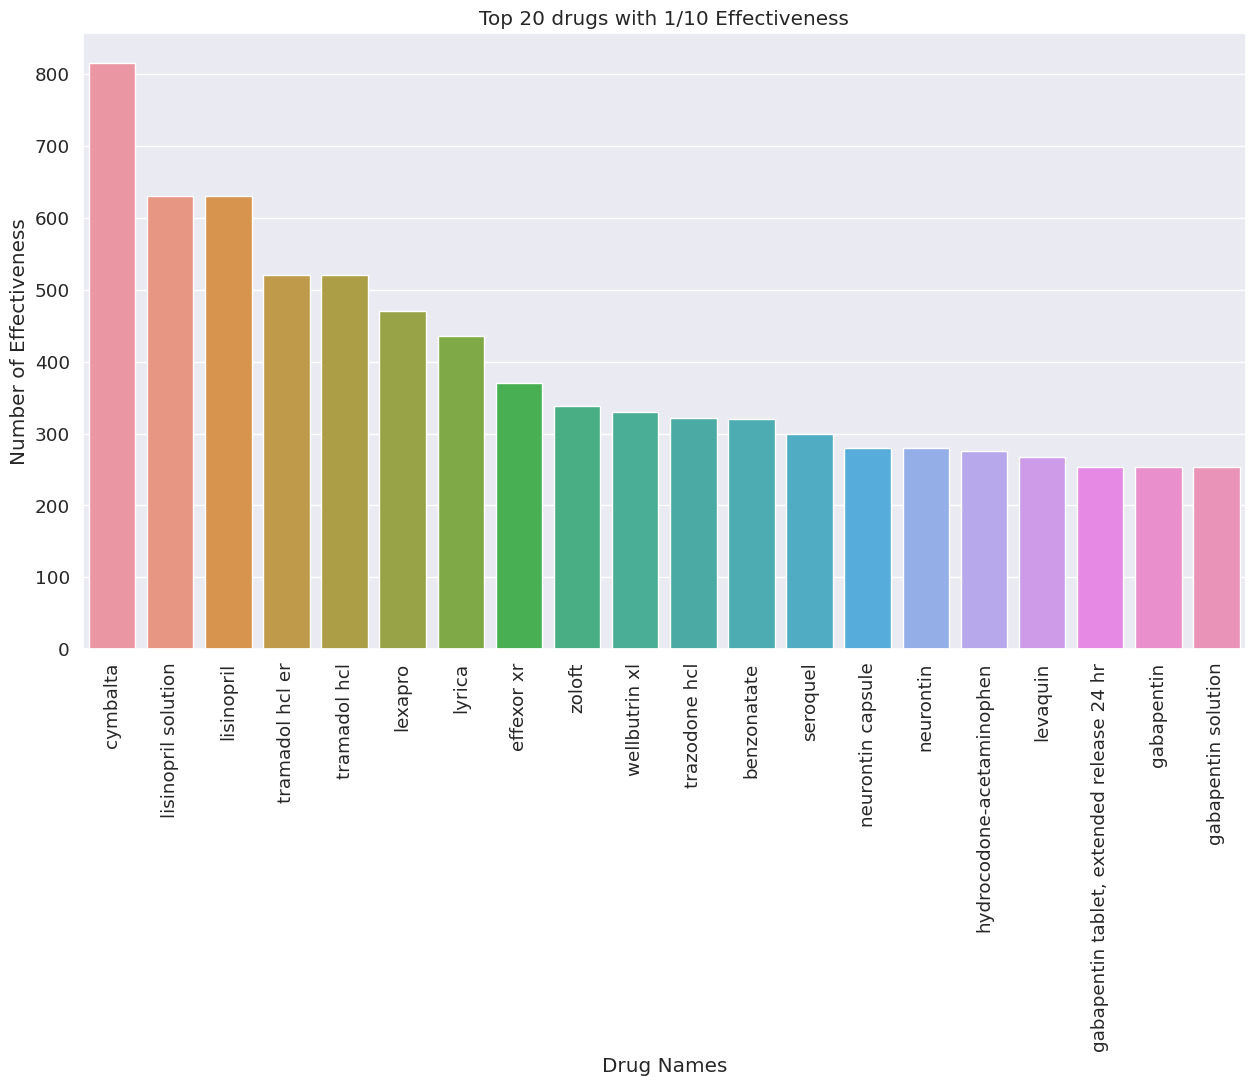

In [53]:
# This barplot shows the top 20 drugs with the 1/10 Effectiveness


# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

Effectiveness = dict(data_cleaned.loc[data_cleaned.Effectiveness == 1, "Drug"].value_counts())
drugname = list(Effectiveness.keys())
drug_Effectiveness = list(Effectiveness.values())

sns_Effectiveness = sns.barplot(x = drugname[0:20], y = drug_Effectiveness[0:20])

sns_Effectiveness.set_title('Top 20 drugs with 1/10 Effectiveness')
sns_Effectiveness.set_ylabel("Number of Effectiveness")
sns_Effectiveness.set_xlabel("Drug Names")
plt.setp(sns_Effectiveness.get_xticklabels(), rotation=90);

cymbalta and lisinopril having the least effectiveness.

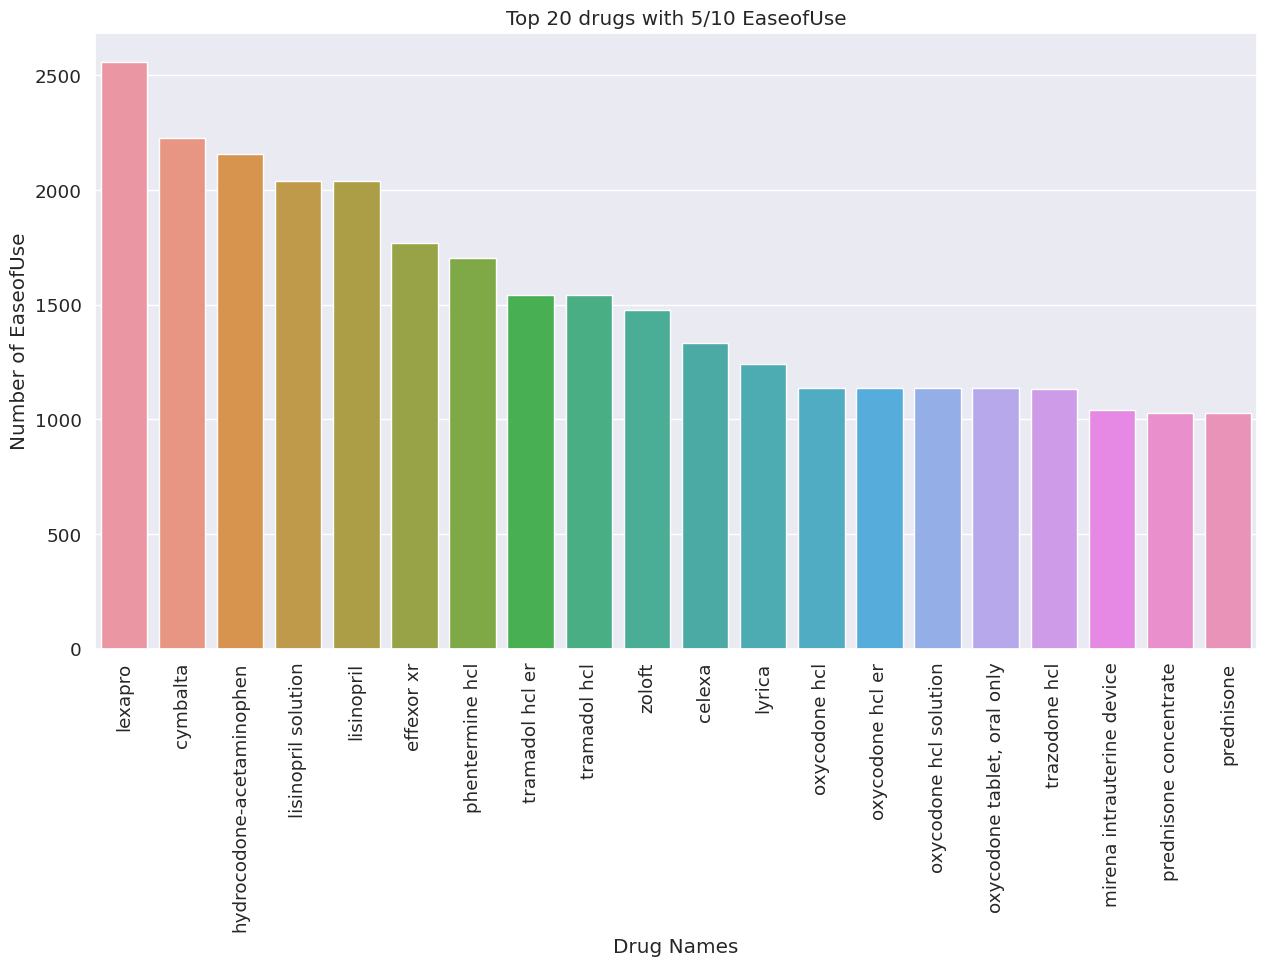

In [54]:
# This barplot shows the top 20 drugs with the 5/10 EaseofUse


# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

EaseofUse = dict(data_cleaned.loc[data_cleaned.EaseofUse == 5, "Drug"].value_counts())
drugname = list(EaseofUse.keys())
EaseofUse = list(EaseofUse.values())

sns_EaseofUse = sns.barplot(x = drugname[0:20], y = EaseofUse[0:20])

sns_EaseofUse.set_title('Top 20 drugs with 5/10 EaseofUse')
sns_EaseofUse.set_ylabel("Number of EaseofUse")
sns_EaseofUse.set_xlabel("Drug Names")
plt.setp(sns_EaseofUse.get_xticklabels(), rotation=90);

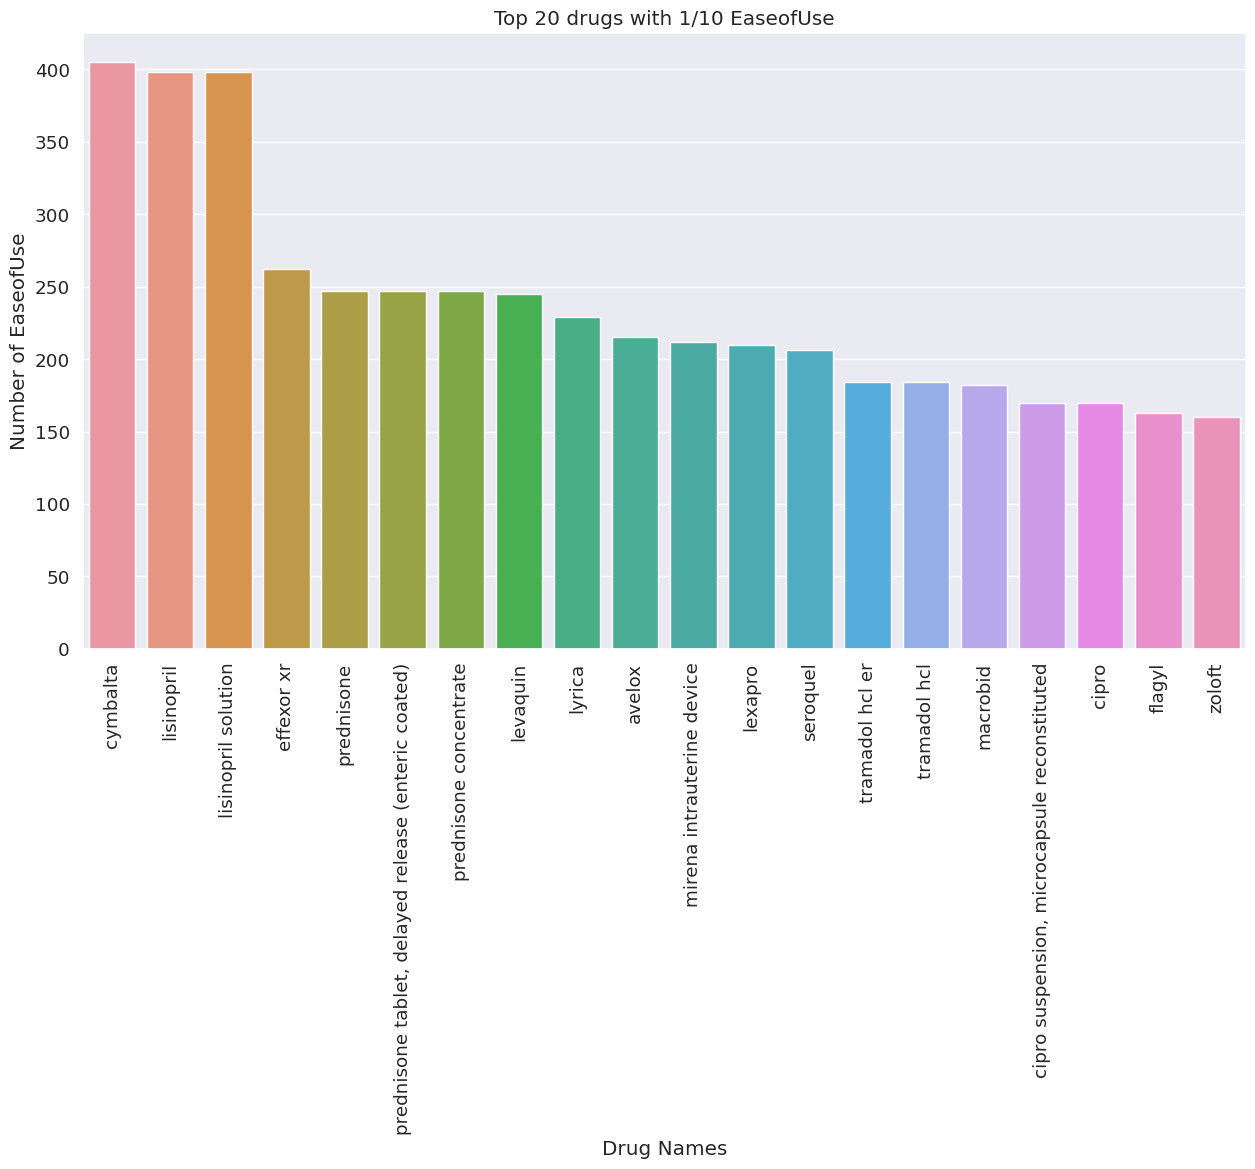

In [55]:
# This barplot shows the top 20 drugs with the 1/10 EaseofUse


# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

EaseofUse = dict(data_cleaned.loc[data_cleaned.EaseofUse == 1, "Drug"].value_counts())
drugname = list(EaseofUse.keys())
EaseofUse = list(EaseofUse.values())

sns_EaseofUse = sns.barplot(x = drugname[0:20], y = EaseofUse[0:20])

sns_EaseofUse.set_title('Top 20 drugs with 1/10 EaseofUse')
sns_EaseofUse.set_ylabel("Number of EaseofUse")
sns_EaseofUse.set_xlabel("Drug Names")
plt.setp(sns_EaseofUse.get_xticklabels(), rotation=90);

Ease of use more good in cymbalta. and lisinipril has less easiness

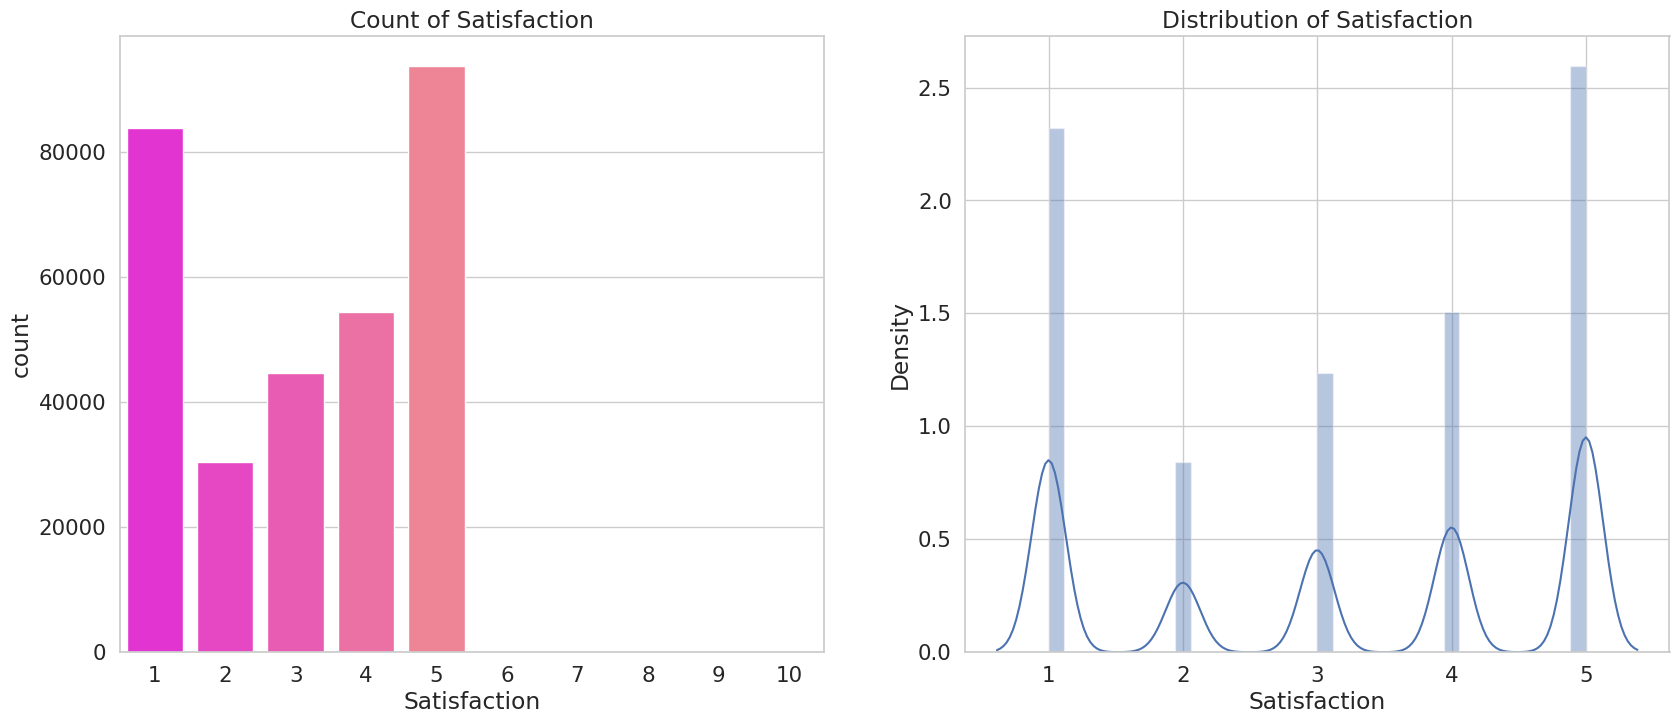

In [56]:
# A countplot of the ratings so we can see the distribution of the ratings

plt.rcParams['figure.figsize'] = [20, 8]
sns.set(font_scale=1.4, style='whitegrid')

fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(x='Satisfaction', data=data_cleaned, palette='spring', order=list(range(1, 11)), ax=ax[0])
sns_2 = sns.distplot(data_cleaned['Satisfaction'], ax=ax[1])

sns_1.set_title('Count of Satisfaction')
sns_1.set_xlabel("Satisfaction")

sns_2.set_title('Distribution of Satisfaction')
sns_2.set_xlabel("Satisfaction")

plt.show()


satisfaction rating is 1 and 5 is most. that means it is equally probable to be satisfied by the drug or not.

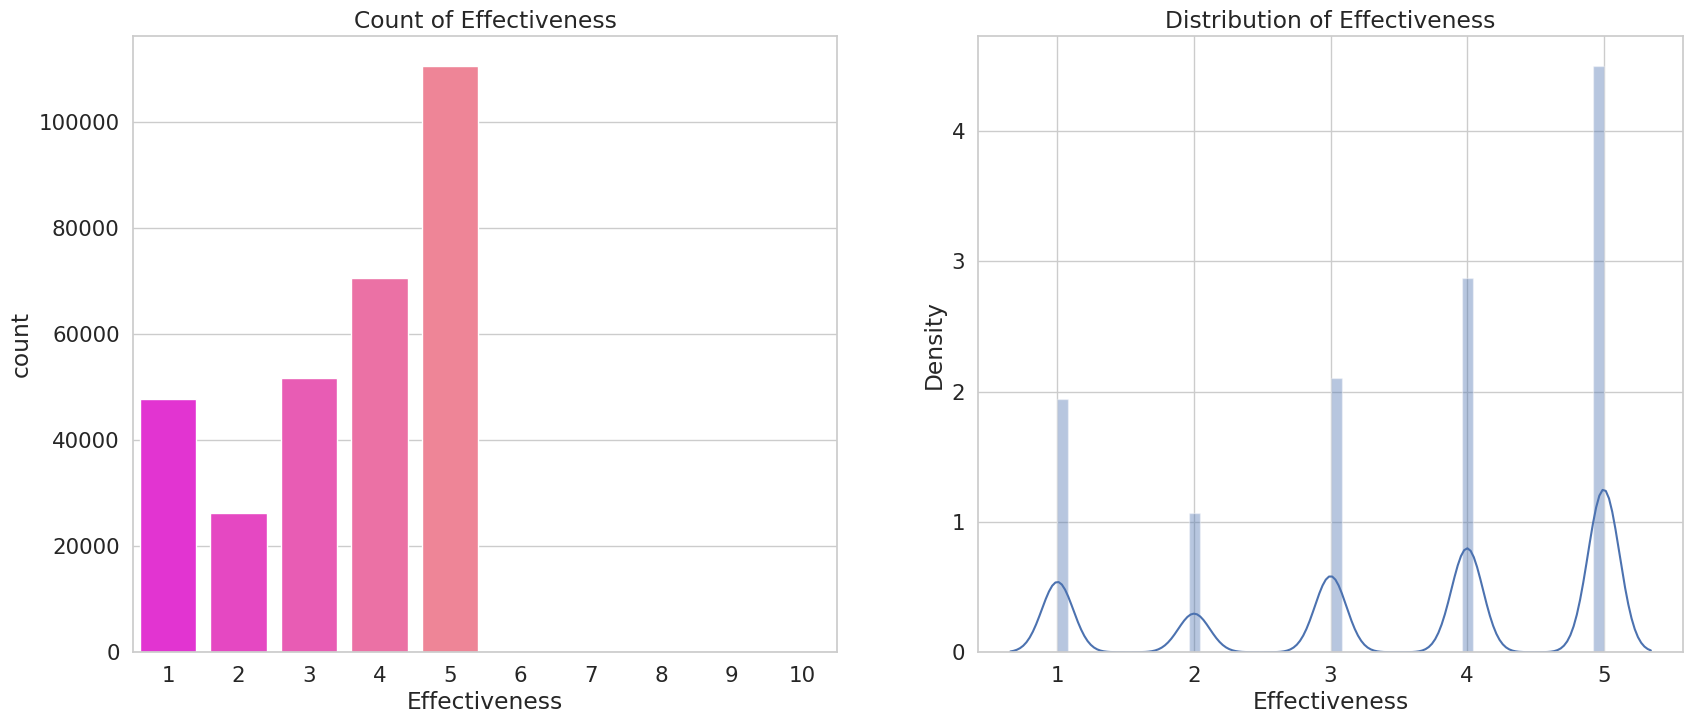

In [57]:
# A countplot of the ratings so we can see the distribution of the ratings

plt.rcParams['figure.figsize'] = [20, 8]
sns.set(font_scale=1.4, style='whitegrid')

fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(x='Effectiveness', data=data_cleaned, palette='spring', order=list(range(1, 11)), ax=ax[0])
sns_2 = sns.distplot(data_cleaned['Effectiveness'], ax=ax[1])

sns_1.set_title('Count of Effectiveness')
sns_1.set_xlabel("Effectiveness")

sns_2.set_title('Distribution of Effectiveness')
sns_2.set_xlabel("Effectiveness")

plt.show()


effectiveness of the medicines are good. eventhough they are having sideeffects.

Text(0.5, 0, 'EaseofUse')

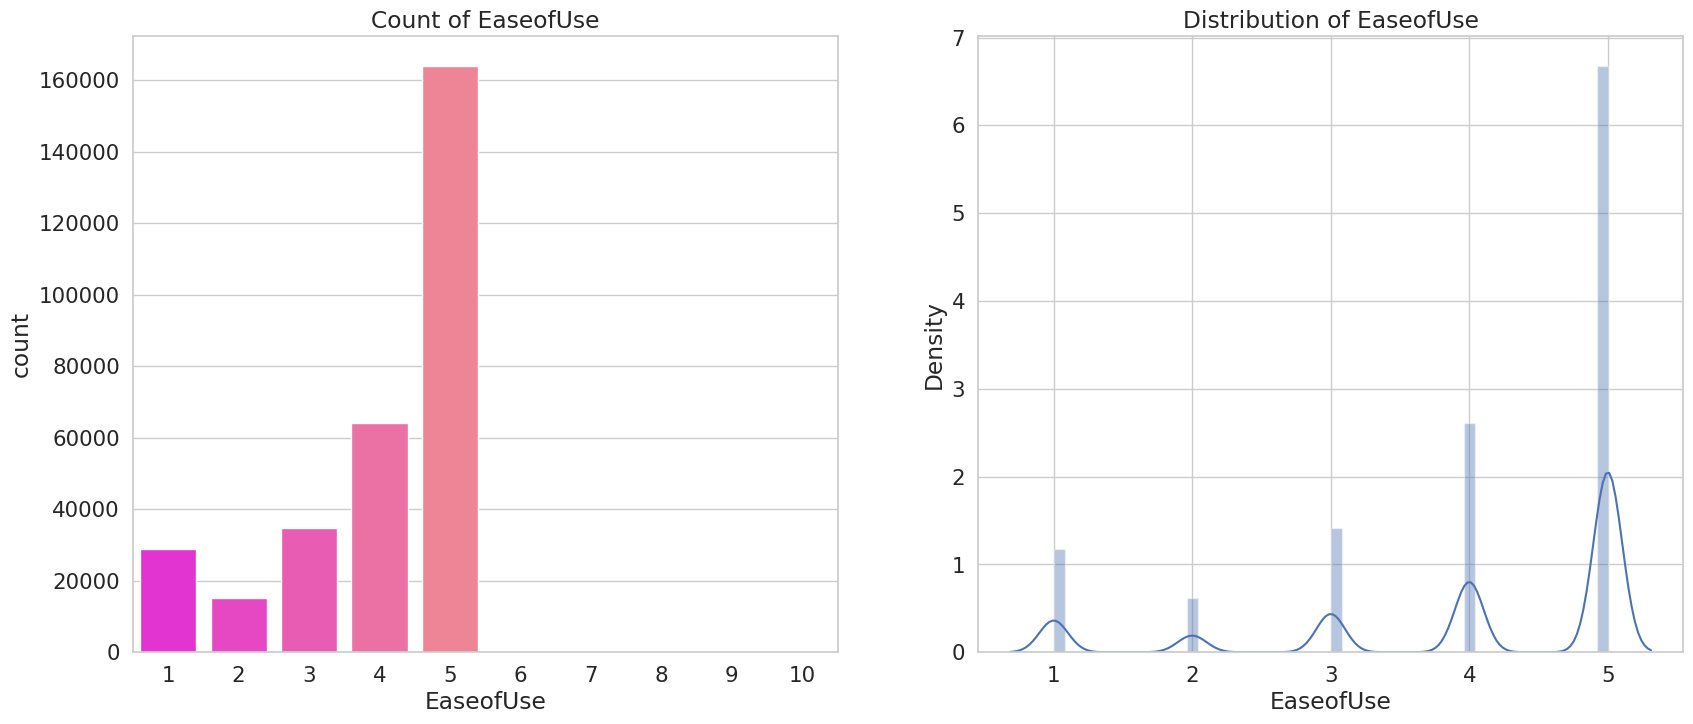

In [58]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(x='EaseofUse',data=data_cleaned, palette = 'spring', order = list(range(1, 11)), ax = ax[0])
sns_2 = sns.distplot(data_cleaned['EaseofUse'], ax = ax[1])
sns_1.set_title('Count of EaseofUse')
sns_1.set_xlabel("EaseofUse")

sns_2.set_title('Distribution of EaseofUse')
sns_2.set_xlabel("EaseofUse")

comparitively easiness to use the drugs are ok for all.

# **MULTIVARIATE DATA ANALYSIS**

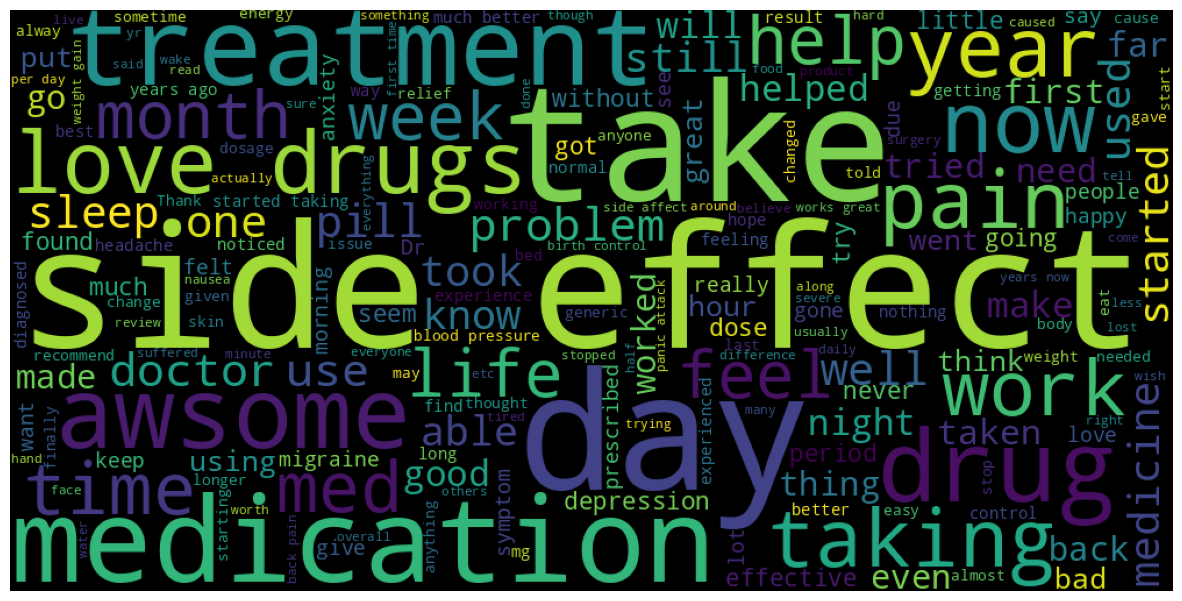

In [59]:
# Word cloud of the reviews with Satisfaction_rating equal to 5
df_rate_ten = data_cleaned.loc[data_cleaned.Satisfaction == 5, 'Reviews']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

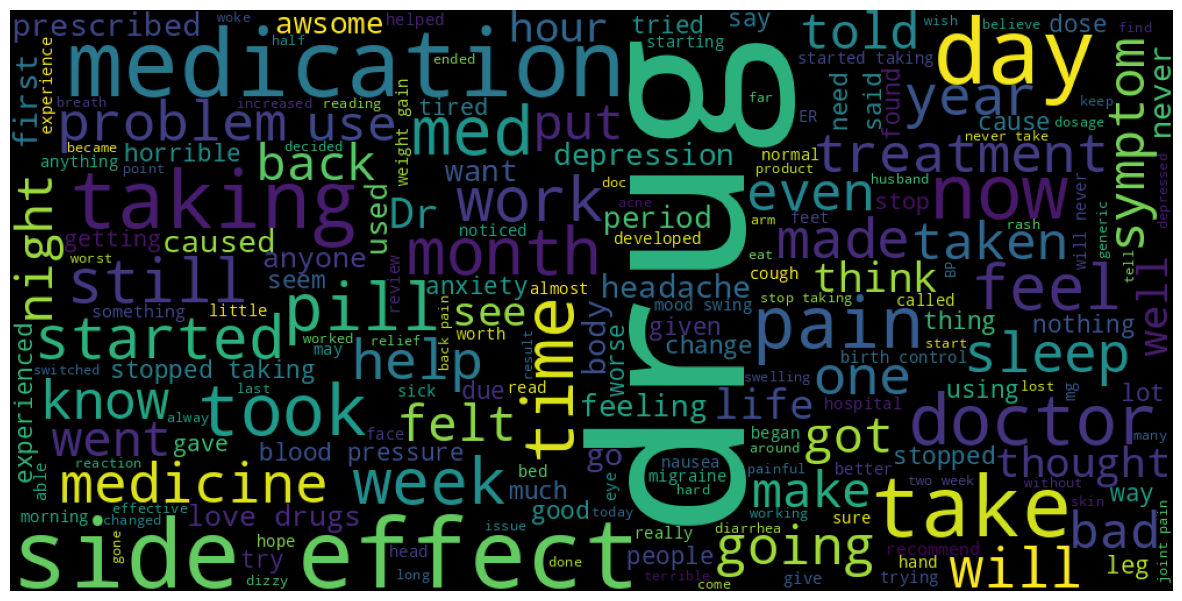

In [60]:
# Word cloud of the reviews with Satisfaction_rating equal to 1
df_rate_ten = data_cleaned.loc[data_cleaned.Satisfaction == 1, 'Reviews']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

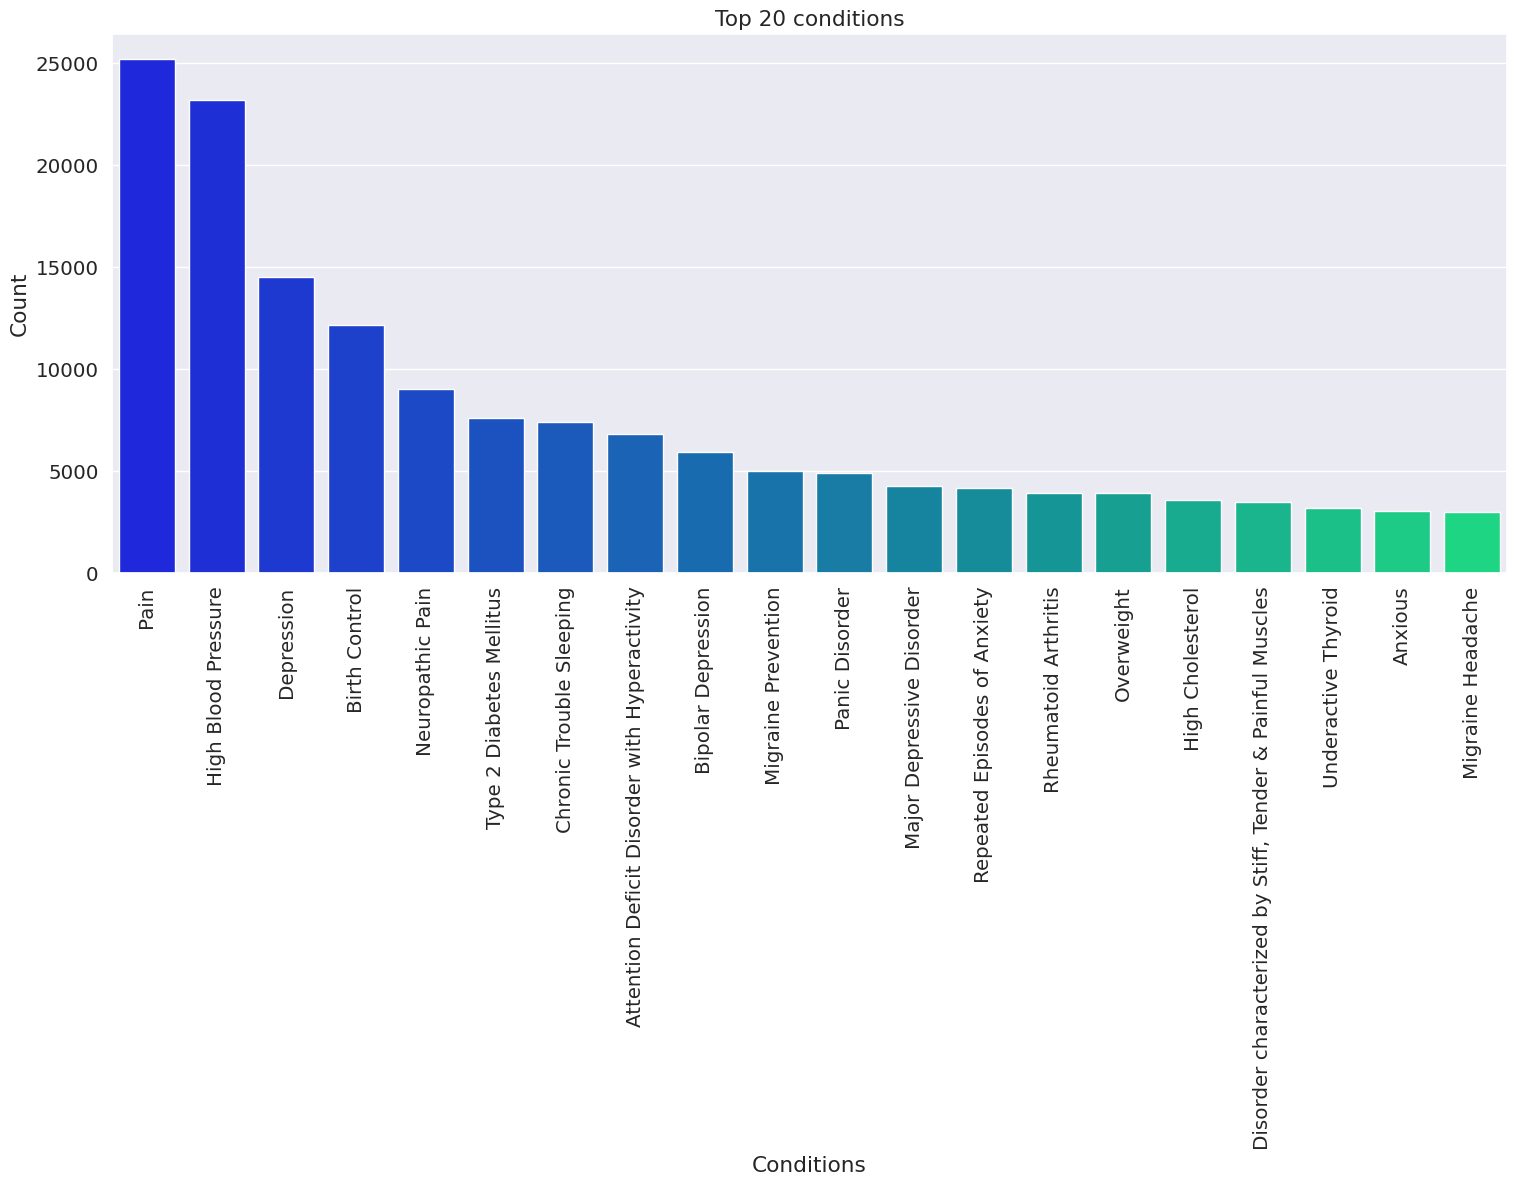

In [61]:
# This barplot show the top 20 conditions the people are suffering.
cond = dict(data_cleaned['Condition'].value_counts())
top_condition = list(cond.keys())[0:20]
values = list(cond.values())[0:20]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 20 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");
plt.setp(sns_.get_xticklabels(), rotation=90);

pain ,BP, depression these all are the main conditions for the usage of the medicines. and pain is the condition most of the users mentioned.

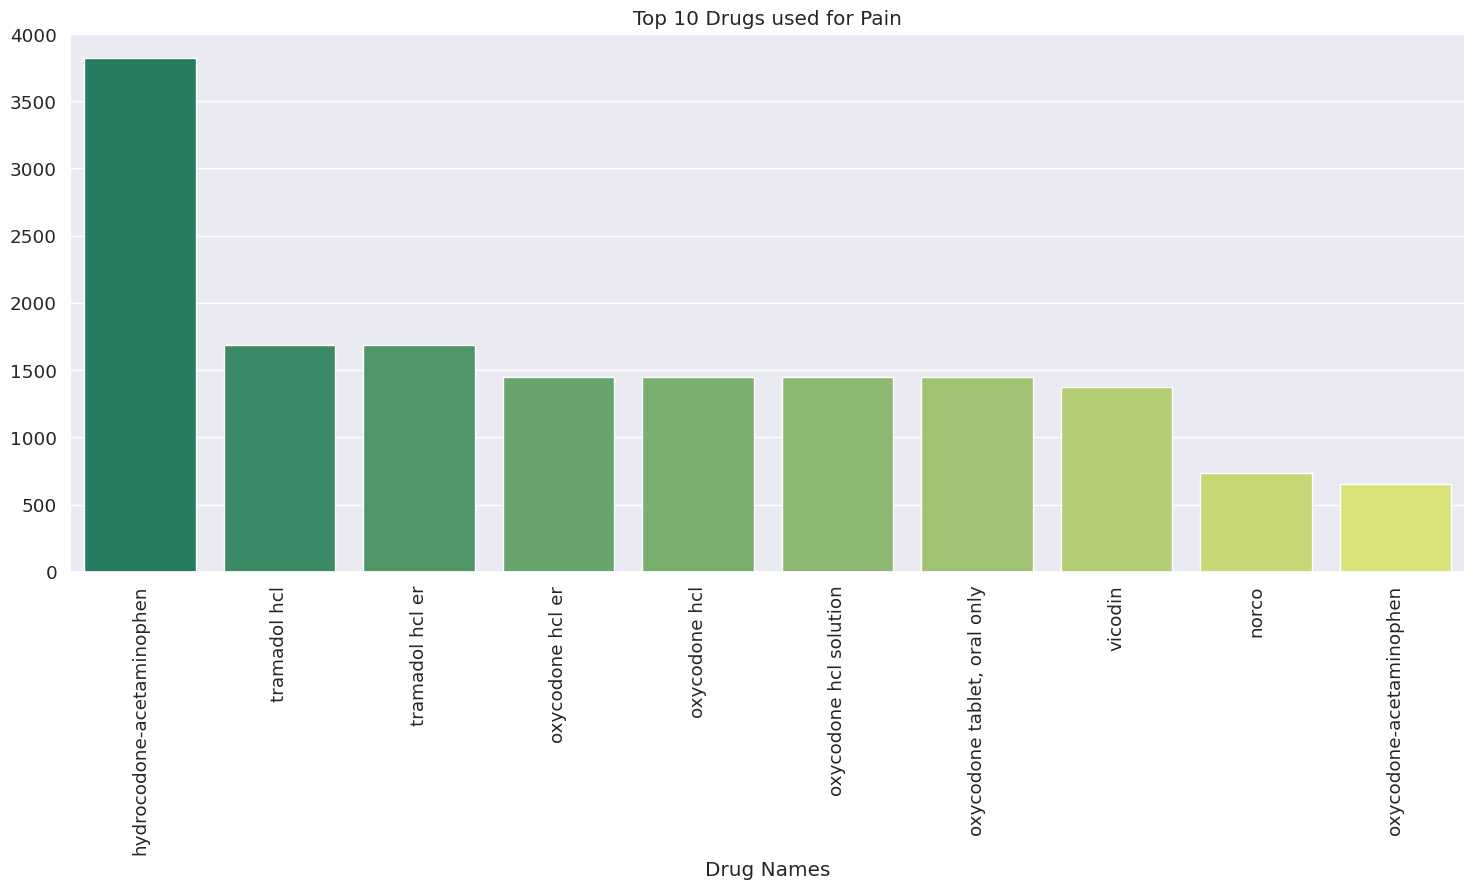

In [62]:
# Top 10 drugs which are used for the pain condition.
df2 = data_cleaned[data_cleaned['Condition'] == 'Pain']['Drug'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df2.index, y = df2.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 90);

These medicines are used for the pain

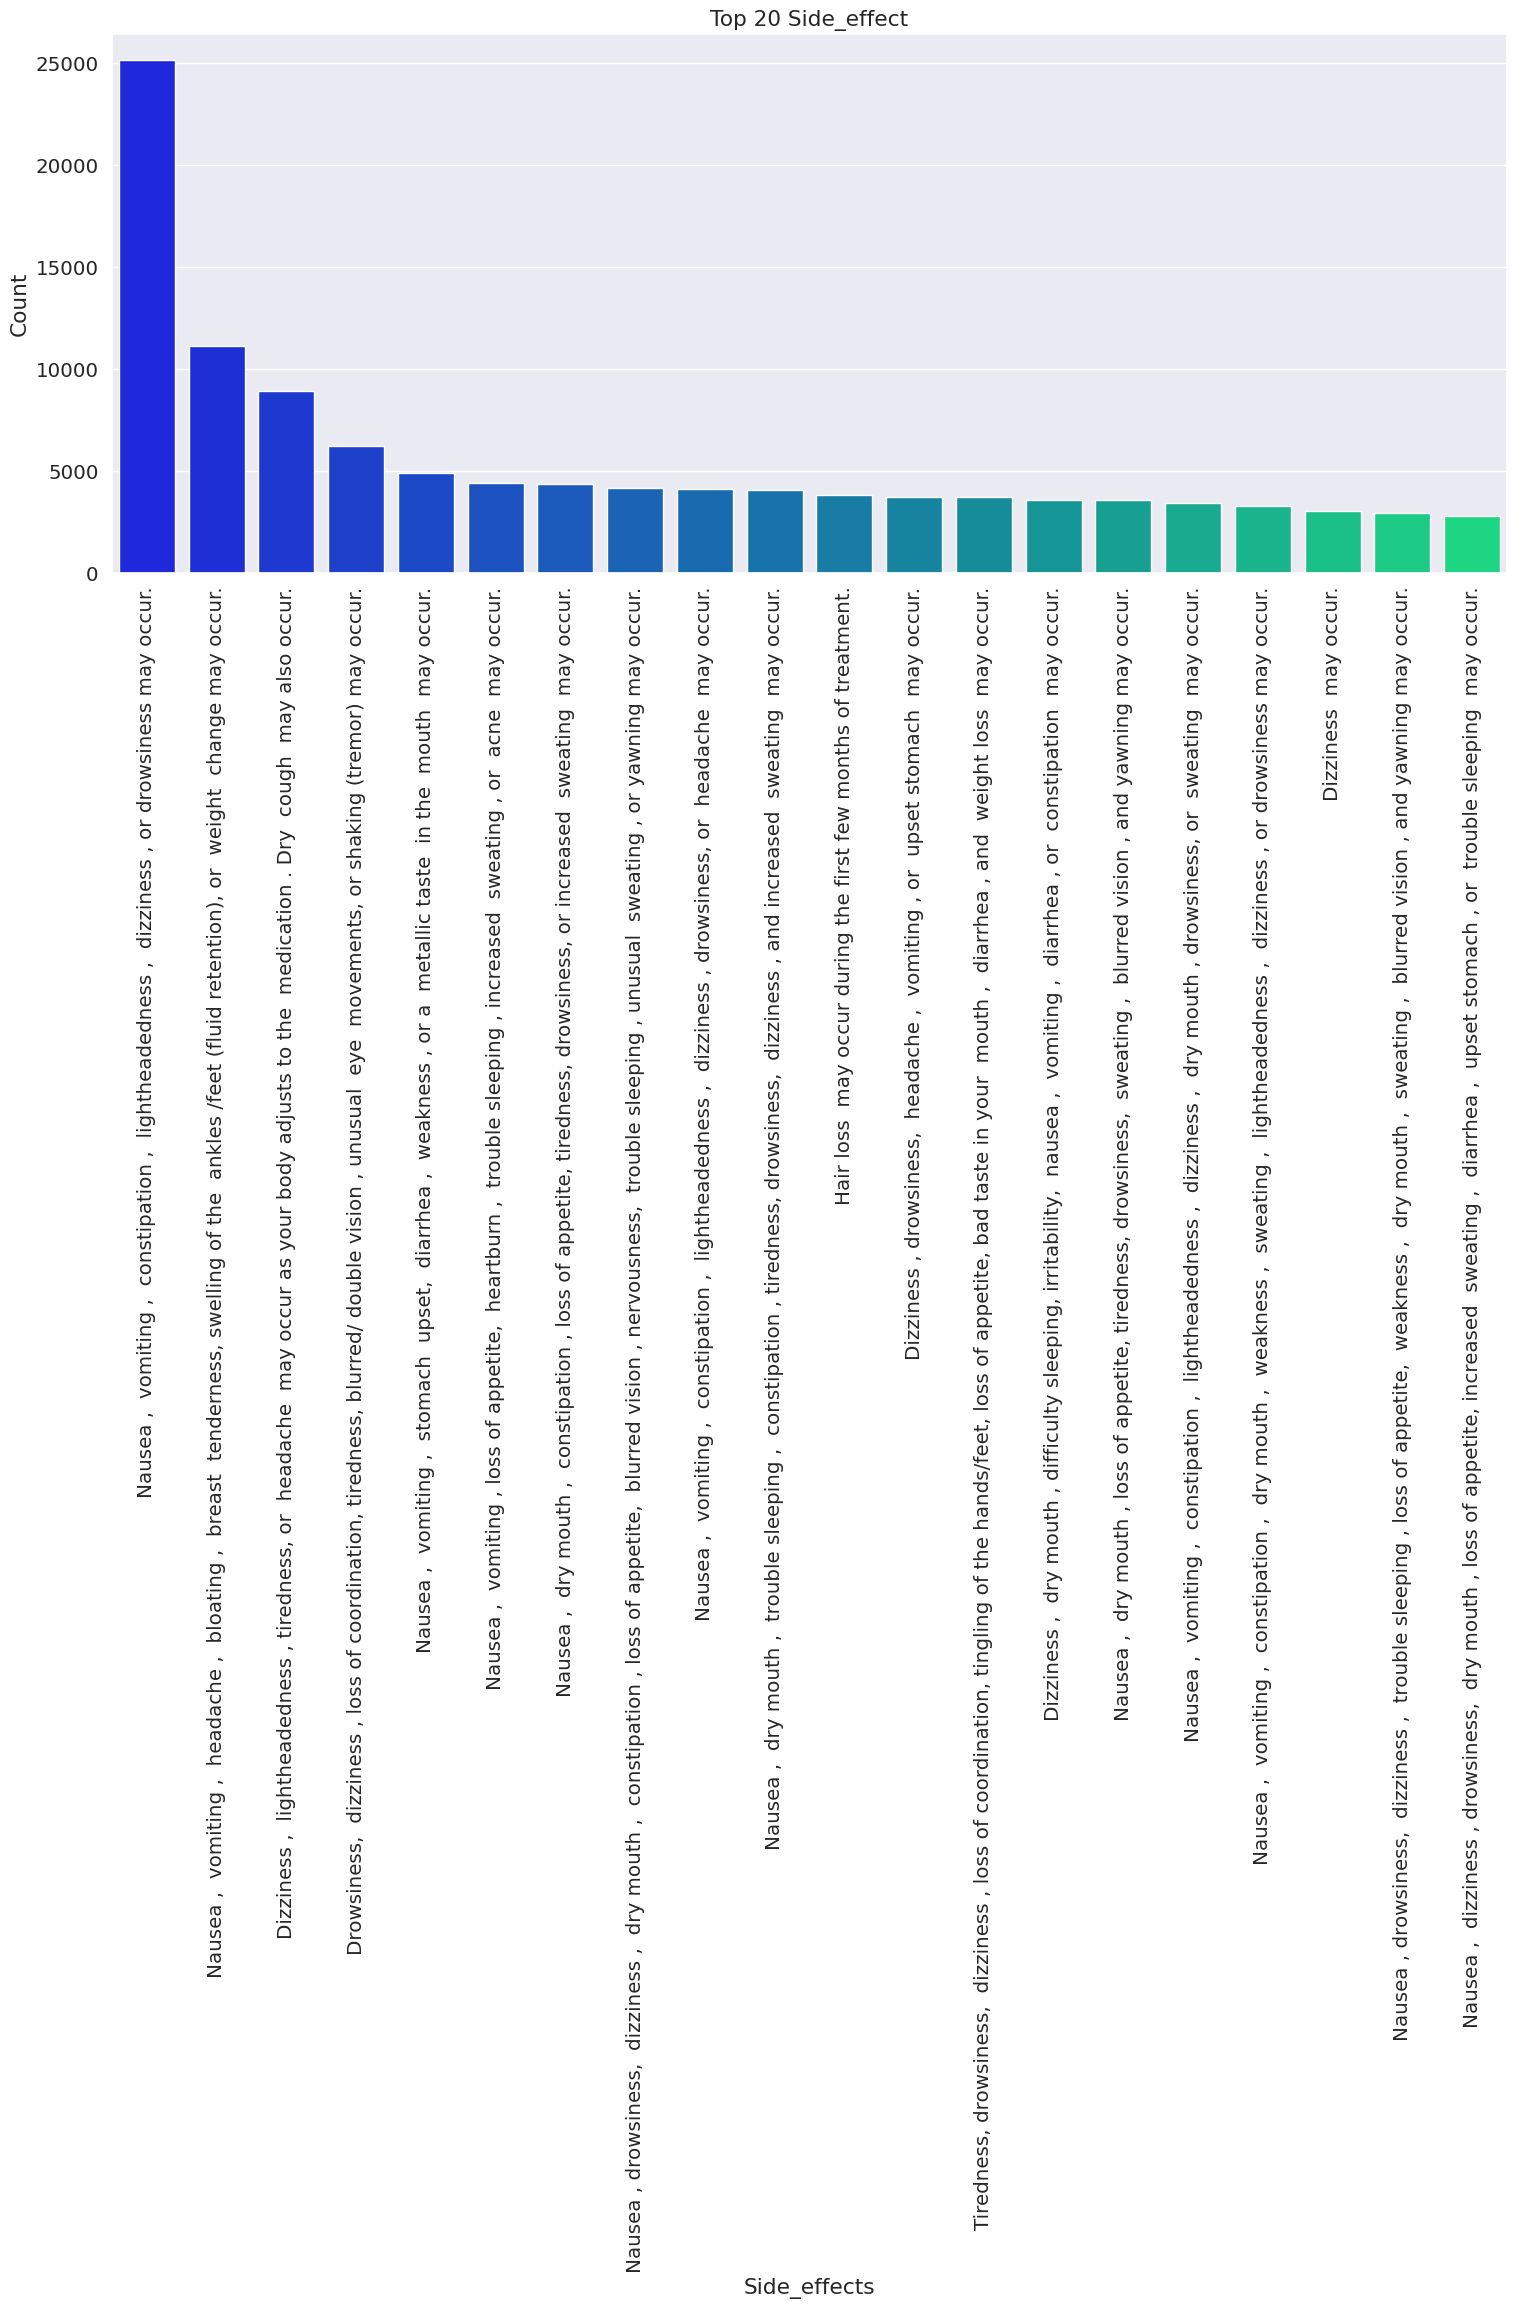

In [63]:
# This barplot show the top 20 side_effects
side = dict(data_cleaned['Sides'].value_counts())
top_Sides = list(side.keys())[0:20]
values = list(side.values())[0:20]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_Sides, y = values, palette = 'winter')
sns_.set_title("Top 20 Side_effect")
sns_.set_xlabel("Side_effects")
sns_.set_ylabel("Count");
plt.setp(sns_.get_xticklabels(), rotation=90);

most of the users have the side effects of nausea drowsiness,dizziness,vomiting etc.while using the pain mediines

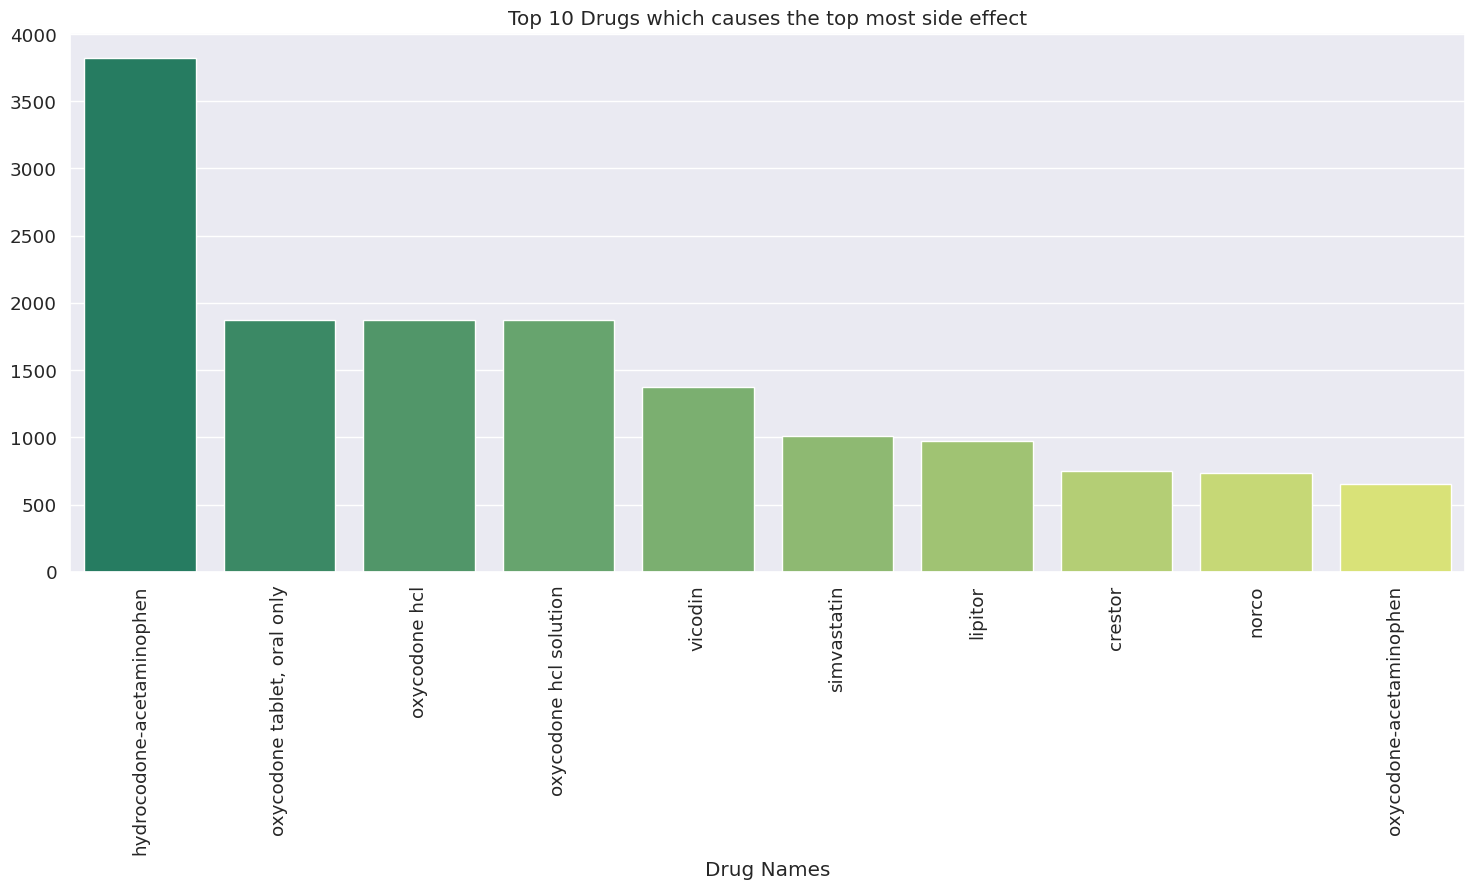

In [64]:
# Top 10 drugs which are responsible for top most side effect
df2 = data_cleaned[data_cleaned['Sides'] == 'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.']['Drug'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df2.index, y = df2.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs which causes the top most side effect")
plt.setp(sns_.get_xticklabels(), rotation = 90);

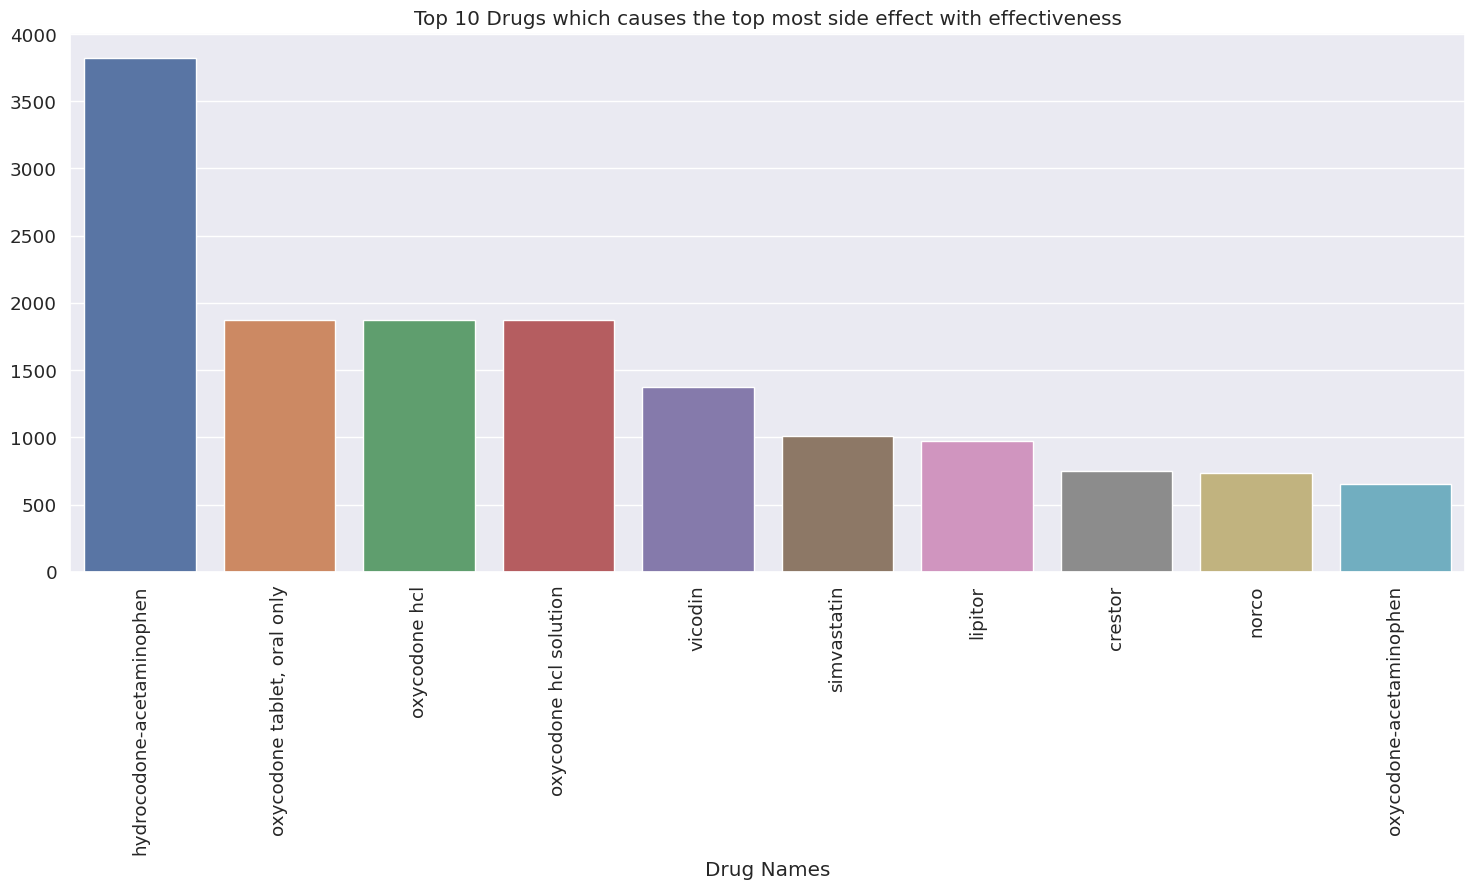

In [65]:


# Filter data
df2 = data_cleaned[(data_cleaned['Sides'] == 'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.') & (data_cleaned['Effectiveness'])]['Drug'].value_counts()[0:10]
sns.set(font_scale = 1.2, style = 'darkgrid')
# Create bar plot
sns_= sns.barplot(x=df2.index, y=df2.values)

# Add labels and title
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs which causes the top most side effect with effectiveness")
plt.setp(sns_.get_xticklabels(), rotation = 90);


Hydrocdone-acetaminophen having the side effects more but its effectiveness also the highest.

satisfaction rate also high in hydrocodone-acetaminophen.
From this i can conclude as even though the sideeffects are high but the effectiveness and satisfaction rate is also maximum.because of that the users are again using

# **Exploratory data analysis**
LISINOPRIL HAVING MOST NUMBER OF ENTRIES IN THIS DATA SET. SO ANALYSING THIS DRUG SEPERATELY FOR A BETTER INSIGHTS.

In [67]:
data2= data_cleaned[data_cleaned.DrugId == 6873] #create a seperate dataset for lisinopril

1. Useful count.
UsefulCount means the Number of users who found the review useful

4.662098524124475

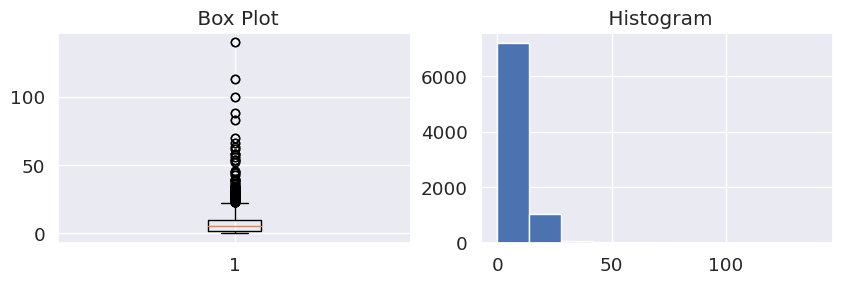

In [68]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["UsefulCount"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["UsefulCount"])
plt.title(" Histogram")
data2.UsefulCount.skew()

The skewness value of approximately 4.66 represents a measure of the skew or asymmetry in the distribution of the "UsefulCount" column data. a positive skewness value (greater than 0) of 4.66 indicates that the distribution of "UsefulCount" is positively skewed or right-skewed.

Positively skewed means that the tail on the right side (higher values) is longer or fatter than the left side (lower values). In other words, the majority of the data points tend to be on the lower side, and there are relatively few data points with very high values.

The magnitude of the skewness value  4.906 provides information about the degree of skewness. Larger positive values indicate a stronger right-skew, meaning the distribution is more heavily concentrated on the left with a long tail to the right.

A positive skew in the "UsefulCount" distribution might suggest that there are relatively few instances with very high "UsefulCount" values, and most instances have lower "UsefulCount" values.


0.20640793967605542

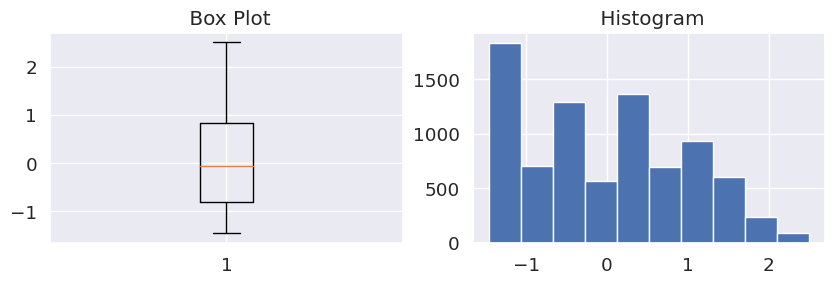

In [69]:
data_Usefulcount = pd.DataFrame(data2['UsefulCount'])

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_Usefulcount1 = pipeline.fit_transform(data_Usefulcount)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_Usefulcount1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_Usefulcount1)
plt.title(" Histogram")
data2['UsefulCount_boxcox'] = data_Usefulcount1
data2['UsefulCount_boxcox'].skew()

A skewness value of 0.2 indicates that the Box-Cox transformed "UsefulCount" data is less skewed compared to the original data (which had a positive skew of approximately 4.906). A skewness value of 0.2O74 suggests that the transformed data is closer to a symmetric distribution, although it may still have some minor skewness.

**EASE OF USE:**
EaseofUse : Patient's 10-Star rating on the ease of use of drug

-1.1806974545756637

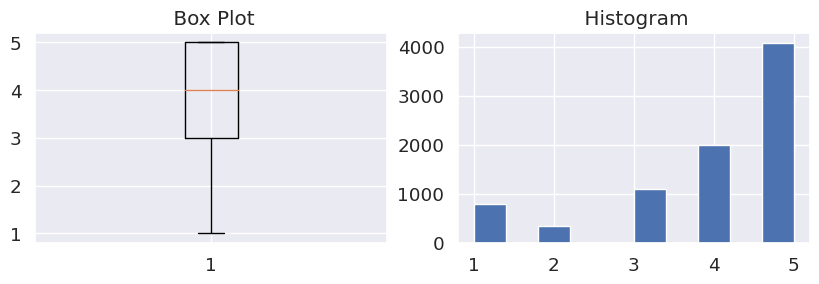

In [70]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["EaseofUse"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["EaseofUse"])
plt.title(" Histogram")
data2.EaseofUse.skew()

A skewness value of approximately -1.19 indicates that the "EaseofUse" column has a strong negative skew (left-skewed) distribution. This means that the majority of the data points tend to be on the higher side, and there are relatively few data points with very low values.

-0.4882749727474515

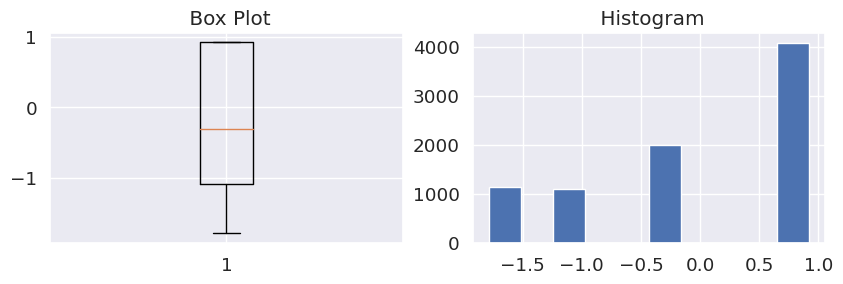

In [71]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

data_EaseofUse = pd.DataFrame(data2['EaseofUse'])
data_EaseofUse1 = pipeline.fit_transform(data_EaseofUse)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_EaseofUse1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_EaseofUse1)
plt.title(" Histogram")
data2['EaseofUse_boxcox'] = data_EaseofUse1
data2.EaseofUse_boxcox.skew()

a negative skew in the data suggests that there are relatively few instances with very low values, and most instances have higher values. A skewness value of approximately -0.49 suggests a moderate degree of left-skew in your data.

# **Satisfaction : Patient's 10-Star rating on satisfaction**

0.20787078536919482

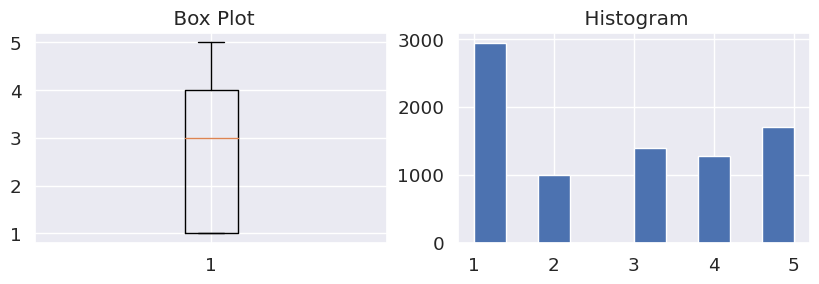

In [72]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["Satisfaction"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["Satisfaction"])
plt.title(" Histogram")
data2.Satisfaction.skew()

A skewness value of approximately 0.2 indicates that the "Satisfaction" column has a slight positive skew (right-skewed) distribution. This means that the tail on the right side (higher values) is slightly longer or fatter than the left side (lower values). However, the skewness is relatively small, suggesting that the data is fairly close to a symmetric distribution.

# **EFFECTIVENESS**

-0.4588658843461786

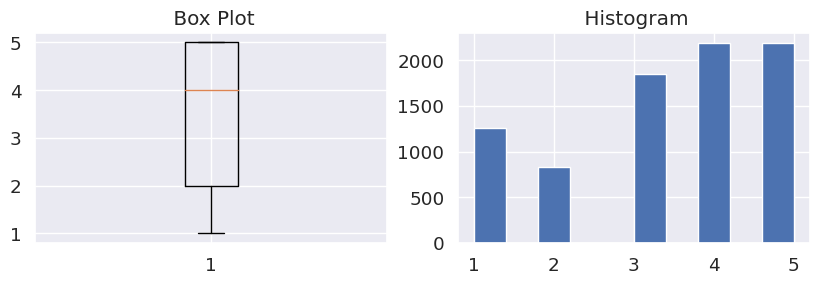

In [73]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["Effectiveness"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["Effectiveness"])
plt.title(" Histogram")
data2.Effectiveness.skew()

A skewness value of approximately -0.45 indicates that the "Effectiveness" column has a moderate negative skew (left-skewed) distribution. This means that the tail on the left side (lower values) is somewhat longer or fatter than the right side (higher values). It suggests that the majority of the data points tend to be on the higher values, but the distribution is not highly skewed.

After checking the skewness and outliers, Usefulcount, easeofuse, effectiveness and satisfaction column has been processed

FEATURE ENGINEERING

# **New Feature creation: Sideeffect**

In [74]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
data2['Sideeffect'] = data2['Satisfaction'].map(mapping)

In [75]:
data2.columns

Index(['Name', 'Race', 'Date', 'Drug', 'DrugId', 'EaseofUse', 'Effectiveness',
       'Satisfaction', 'UsefulCount', 'Age', 'Reviews', 'Sex', 'Sides',
       'Condition', 'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect'],
      dtype='object')

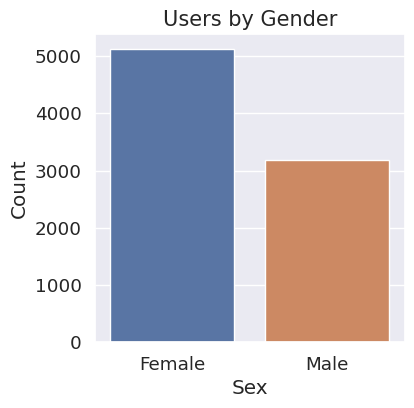

In [76]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data2)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Female users are predominant


Text(0, 0.5, 'Count')

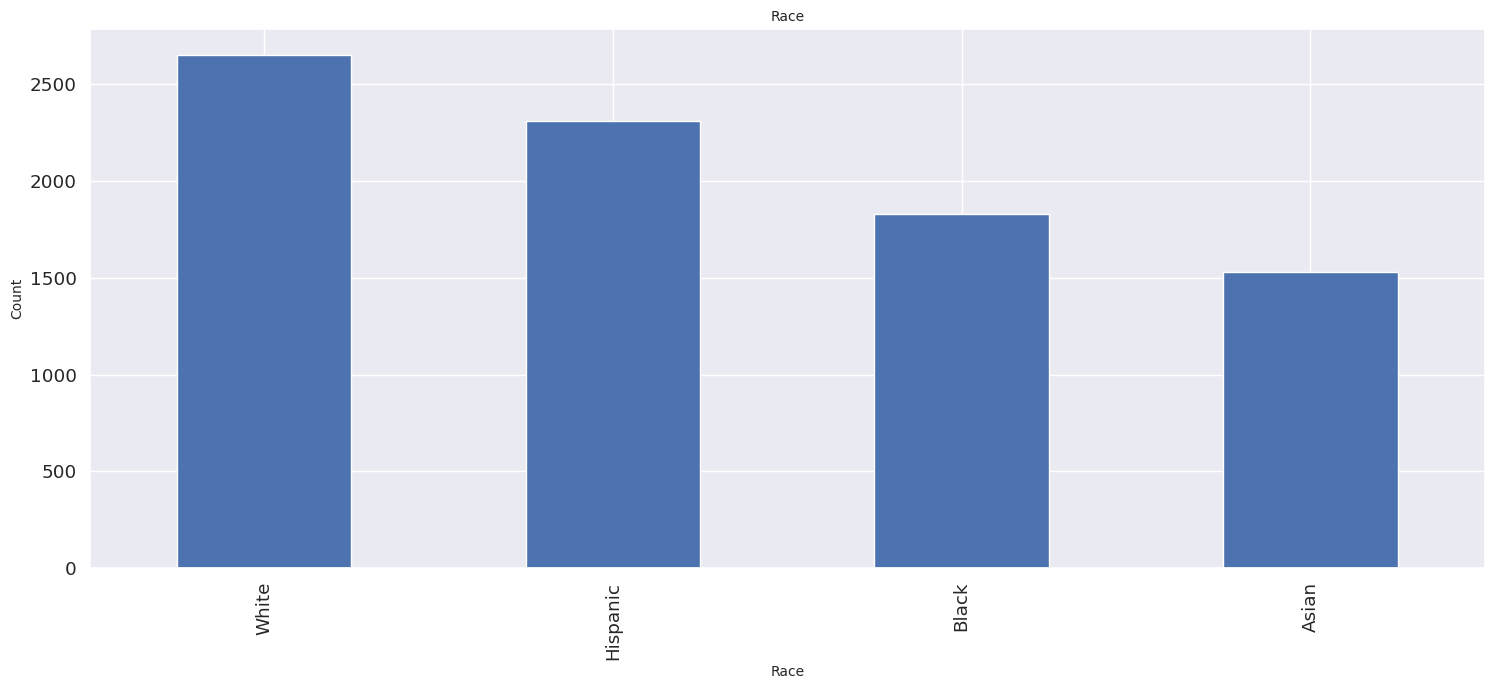

In [94]:

#Which race is the predominant user?
data2['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0.5, 1.0, 'Users by Race and Gender')

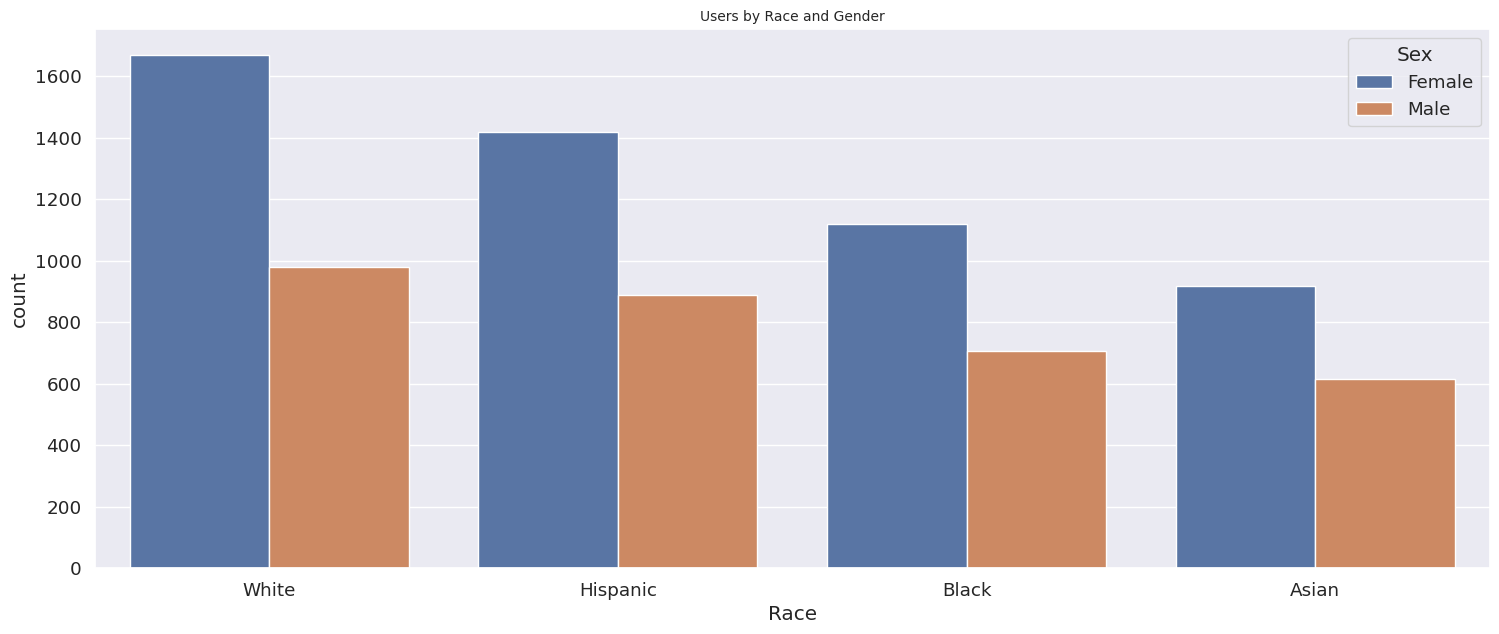

In [78]:
#In each race, which gender is the predominant user?
sns.countplot(x='Race',hue='Sex',data=data2)
plt.title("Users by Race and Gender", fontsize = 10)

Text(0.5, 1.0, 'Users by Age and Gender')

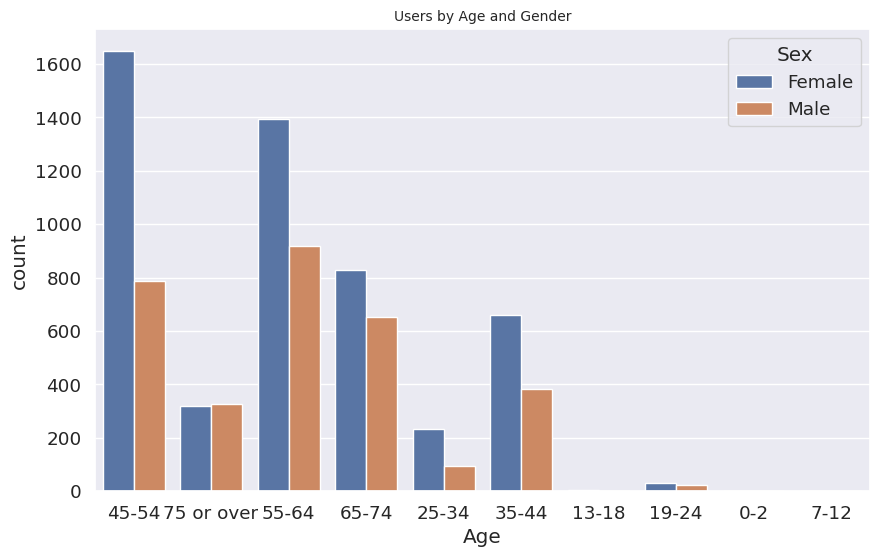

In [79]:
#In each age group, which gender is the predominant user?
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data2)
plt.title("Users by Age and Gender", fontsize = 10)

white race females of age45-54 are dominant

Text(0, 0.5, 'Count of Reviews')

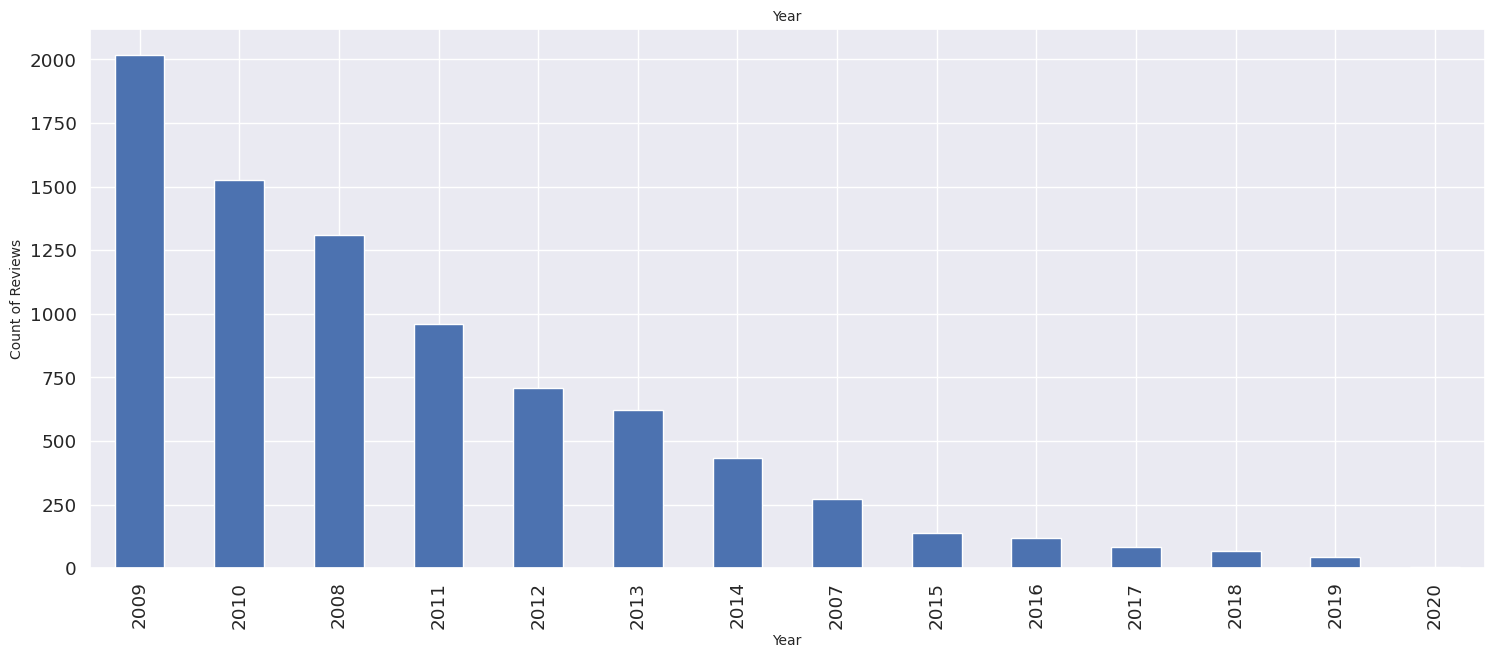

In [80]:
#In each year, how many reviews were collected?
data2['Year'].value_counts().plot(kind='bar')
plt.title("Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)

In each year, there is a gradual decrease in user reviews

Text(0, 0.5, 'Count')

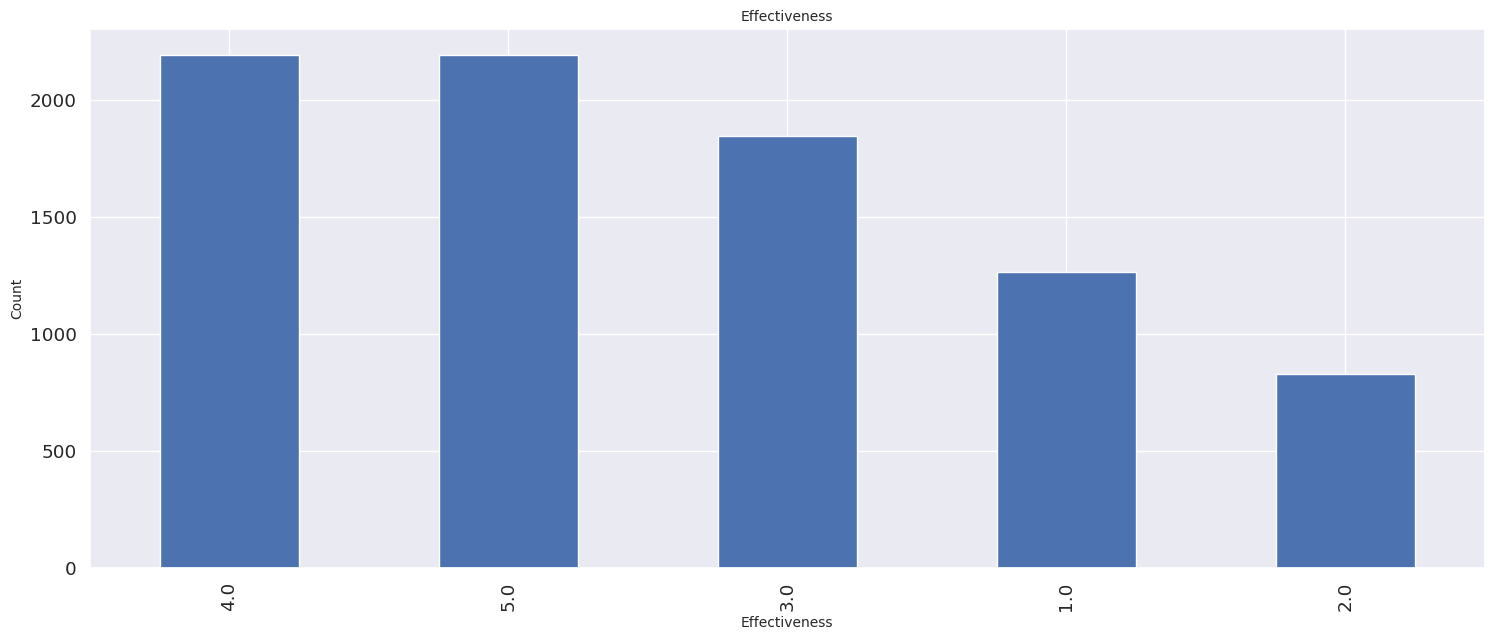

In [81]:

#how effective is the drug?
data2['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

The drug is fairly effective with around 1600 users voting a 4 rating to it.

<Figure size 1000x800 with 0 Axes>

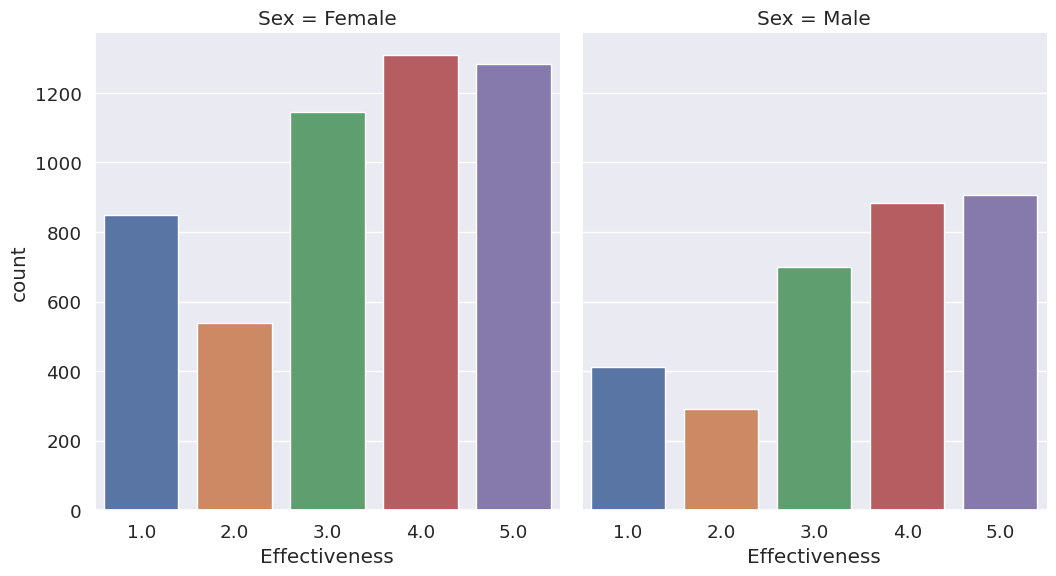

In [82]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data2, kind="count",
                height=6,aspect =.9);

we cant find a clear conclusion . its a mixed response.

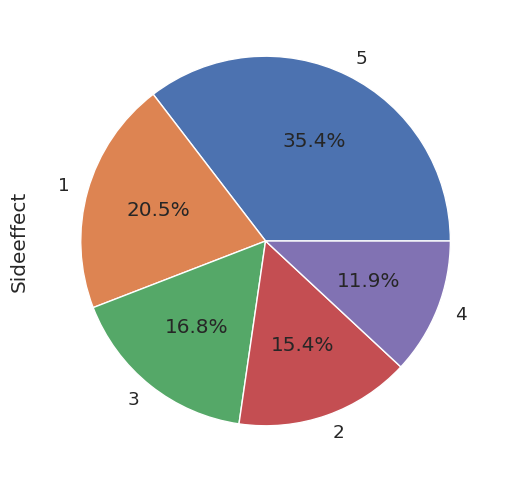

In [83]:
#How many reported side effects for the drug?
plt.figure(figsize=(6,6))
data2['Sideeffect'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

35.5% users reported extreme sideeffects. with 1 being no side effect and 5 being extreme side effect

<Axes: xlabel='Age', ylabel='count'>

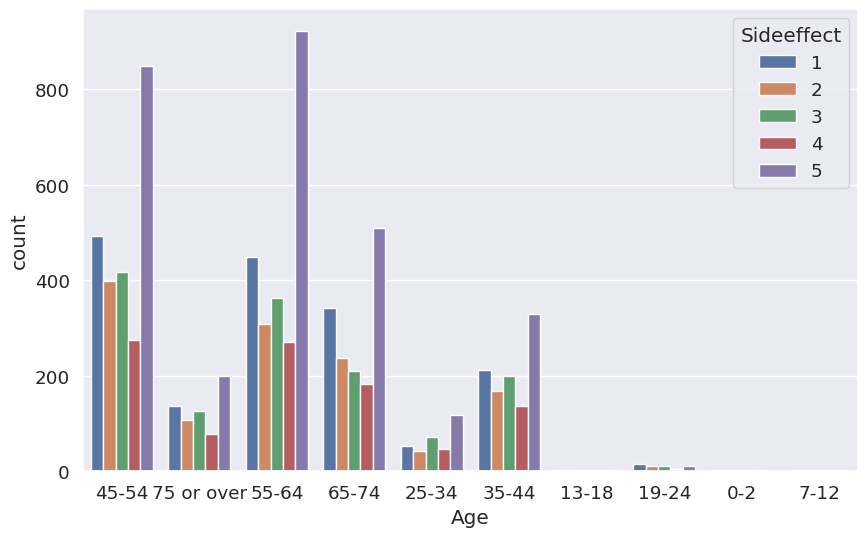

In [84]:
#Which age group has reported most side effect?
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sideeffect',data=data2)

55-64 age group has opinionated that they had extreme side effects

<Figure size 2000x1000 with 0 Axes>

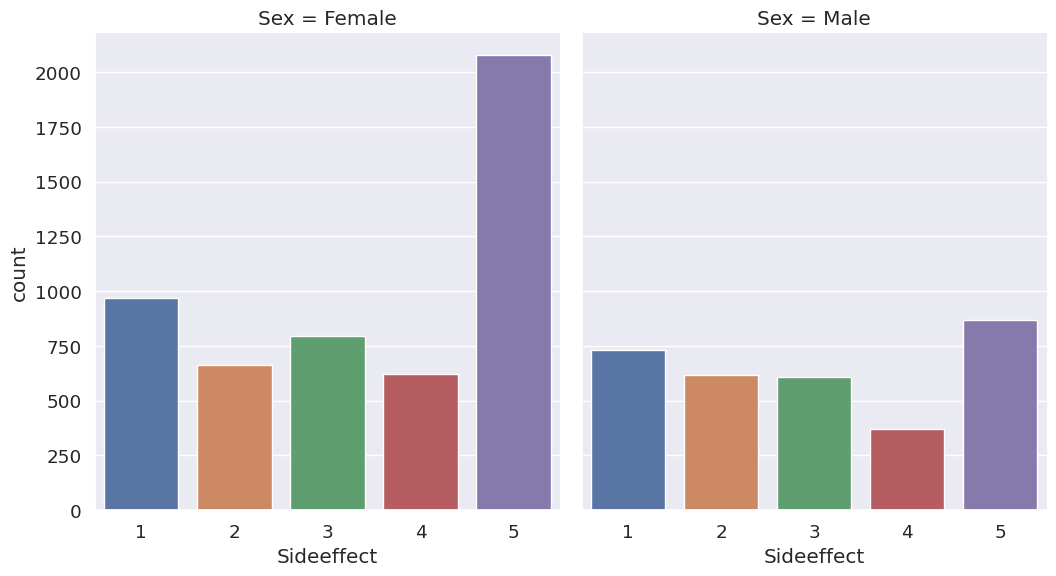

In [85]:
#Among both the gender category, how is the sideeffects of the drug?
plt.figure(figsize=(20,10))

g = sns.catplot(x="Sideeffect",col="Sex",data=data2, kind="count",height=6,aspect =.9);


Female users have reported more extreme side effects

<Axes: xlabel='Race', ylabel='count'>

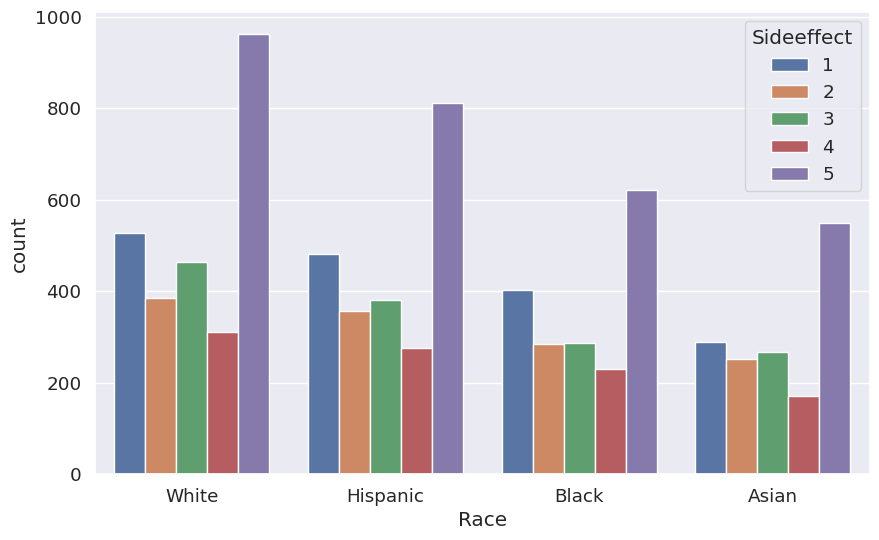

In [86]:
#which race has reported extreme side effects?
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Sideeffect',data=data2)


White and Hispanic users reported more extreme side effects

For the Lisinopril drug as example , i concluded as this drug have side effects but its effectiveness and satisfaction rate is good.Females are more affected by the sideeffects and females are the main users. age group of 55-64 having adverse affects. 45-64 is almost the same sideeffects. reviews counts decreased yearly. That means users body are adjusted to sideeffects or however users have the mentality to cure the sickness and not too much worry about sideeffects.